

# Exercise: Day-Ahead Consumption Prediction for the ETSEIB Building


In this exercise, the goal is to train a machine learning regression model to predict the next day’s energy consumption for the ETSEIB building at UPC.

The [SIRENA](https://serveistic.upc.edu/ca/sirena) tool (Information System for Energy and Water Resources of UPC) is used for monitoring and evaluating energy and resource usage across UPC. It tracks the consumption of electricity, gas, and water, along with photovoltaic energy production and indoor air quality across UPC facilities.


<img src="Figures/sirena-upc.png" alt="Drawing" style="width: 800px;"/>


* **Objective**
Develop a model that forecasts the ETSEIB building’s energy consumption (in kWh) for the following day. The model will rely on historical consumption data and meteorological information to make accurate predictions.

* **Data Sources**
    * Consumption Data: Historical data on electricity, gas, and water consumption can be downloaded from the SIRENA platform, which centralizes utility usage data for UPC.

    * Weather Data: Meteorological data is available from Spain’s Open Data service, AEMET. This data includes relevant weather information, which can be a key factor in predicting energy consumption patterns.




---

<div style="background-color: #ffffe0; padding: 15px; border-radius: 5px;">

# **Let's build a first model! (version_0)**

</div>

---

In [1]:
# We import libraries
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Suppress FutureWarnings

# We load the input data set
dataset = pd.read_excel('Data/etseib-consumption.xlsx')


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 1. Understanding the Data
    
</div>

> It is necessary to visualize and understand the data we are going to work with, as well as to know its characteristics.
> 
> - How many rows do we have? How many attributes are there in the data?
> - What are these attributes?
> - Is there any missing data?
> - Statistical summary of the input data set.


In [2]:
### Dataset shape
dataset.shape

(10369, 3)

In [3]:
# First 5 rows
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10369 entries, 0 to 10368
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            10369 non-null  datetime64[ns]
 1   Hour                10369 non-null  datetime64[ns]
 2   ETSEIB_consumption  10369 non-null  int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 243.2 KB



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Let's delete the repeated column 
    
</div>




In [ ]:
dataset.drop(columns=["Hour"], inplace=True)
dataset

,Datetime,ETSEIB_consumption
0,2023-09-01 00:00:00,100
1,2023-09-01 01:00:00,98
2,2023-09-01 02:00:00,97
3,2023-09-01 03:00:00,96
4,2023-09-01 04:00:00,96
...,...,...
10364,2024-11-05 19:00:00,282
10365,2024-11-05 20:00:00,217
10366,2024-11-05 21:00:00,168
10367,2024-11-05 22:00:00,143


In [5]:
# data format
dataset.dtypes

Datetime              datetime64[ns]
ETSEIB_consumption             int64
dtype: object

In [6]:
# Check for missing data
dataset.isna().sum()

Datetime              0
ETSEIB_consumption    0
dtype: int64

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Plot the ETSEIB dataset consumption
    
</div>


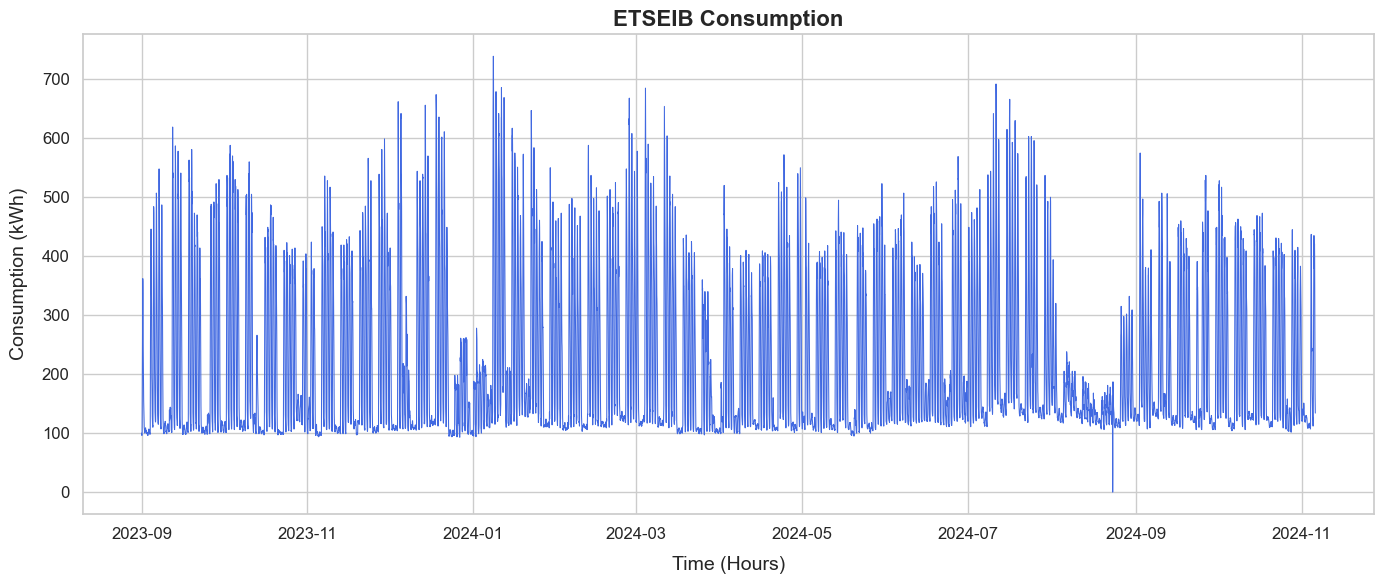

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a larger figure for better clarity
plt.figure(figsize=(14, 6))

sns.lineplot(data=dataset, x='Datetime', y='ETSEIB_consumption', color='royalblue', linewidth=0.75)

# Title and labels
plt.title('ETSEIB Consumption', fontsize=16, weight='bold')
plt.xlabel('Time (Hours)', fontsize=14, labelpad=10)
plt.ylabel('Consumption (kWh)', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12)

# Increase y-axis label font size for better visibility
plt.yticks(fontsize=12)

# Show gridlines for better readability of the plot
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
dataset.describe()

,Datetime,ETSEIB_consumption
count,10369,10369.000000
mean,2024-04-03 23:37:14.159513856,219.148713
min,2023-09-01 00:00:00,0.000000
25%,2023-12-17 23:00:00,117.000000
50%,2024-04-04 00:00:00,144.000000
75%,2024-07-21 00:00:00,321.000000
max,2024-11-05 23:00:00,739.000000
std,NaN,135.739199


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Create the ProfileReport() 
    
</div>


In [9]:
from pandas_profiling import ProfileReport


profile = ProfileReport(dataset, title='Profile Report')

C:\Users\stsad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\stsad\AppData\Local\Temp\ipykernel_20592\240528492.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [10]:
profile.to_file("your_report2.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 59.34it/s]


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

We have noticed that there is a row that is repeated. We delete it    
</div>




In [11]:
# Remove duplicate rows
dataset = dataset.drop_duplicates()


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 2. Exploratory Data Analisys (EDA). Visualize the data. 
    
</div>

> Exploratory Data Analysis is the process of analyzing and visualizing datasets to summarize their main characteristics, with the help of graphical representations. It is a critical step in the machine learning pipeline because it helps to understand the structure, patterns, and relationships within the data before applying machine learning models.

> The **goal** of EDA is to gain insights into the data, identify any issues such as missing values or outliers, and make informed decisions about data preprocessing, feature engineering, and model selection.


> ### Histogram,  density plots and boxplots

> * **Histograms** are useful when you need to see the actual count of data points in each range and when you want to visualize the data's distribution with specific bins.

> * **Density** plots are better when you want to visualize the overall shape of the data's distribution and avoid the randomness introduced by binning in histograms. Density plots are also great for comparing distributions between groups or variables because they provide a smooth estimate without the arbitrary choice of bin size.

> * A **boxplot** is a graphical representation of the distribution of a dataset, highlighting its median, interquartile range (IQR), and outliers. In machine learning, boxplots are useful for detecting outliers, understanding data distribution, and guiding feature engineering.

<Axes: xlabel='ETSEIB_consumption', ylabel='Count'>

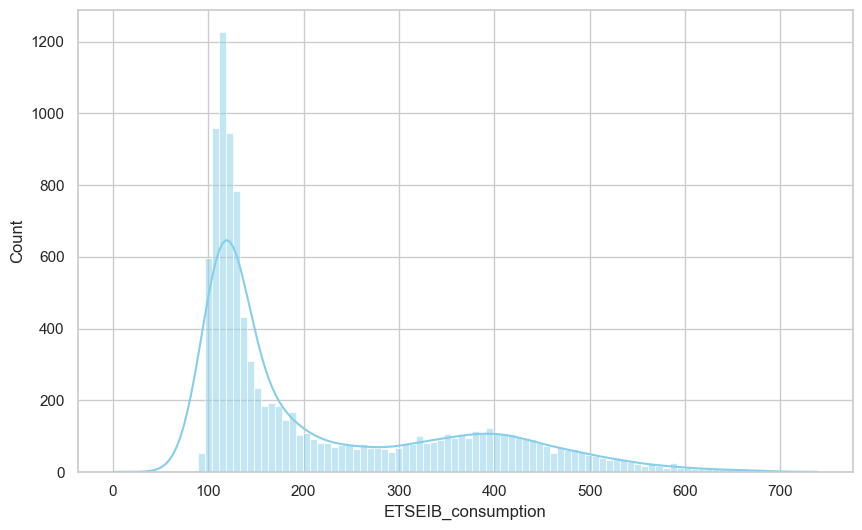

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(dataset["ETSEIB_consumption"], kde=True, bins=100, color='skyblue')

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;font-weight: bold; margin-top: 25px;">

Density plots
    
</div>

> * Let's compare the distributions for each month and compare them with the overall dataset
> * In order to do so, we need to create a new input feature: **month**

In [13]:
# create a new input feature: month
dataset['month'] = dataset['Datetime'].dt.month


C:\Users\stsad\AppData\Local\Temp\ipykernel_20592\3570186430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['month'] = dataset['Datetime'].dt.month


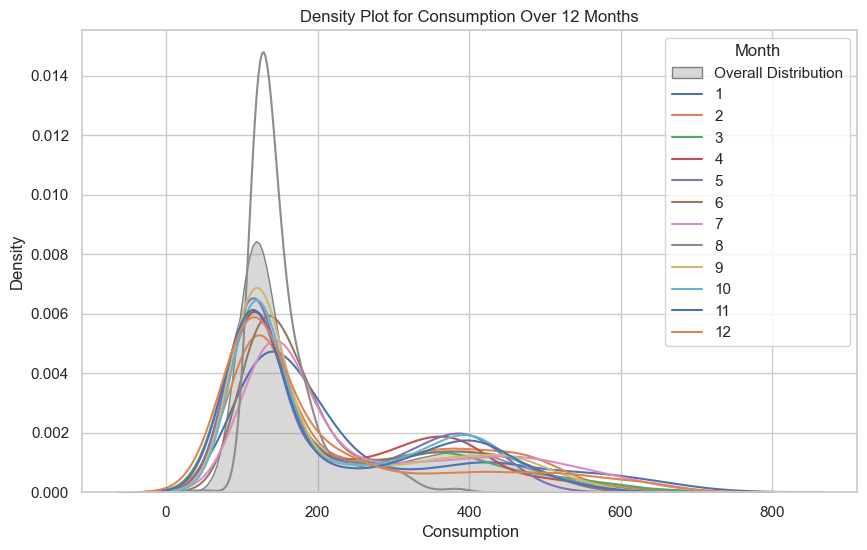

In [14]:
# Plotting Density Plot for 12 Months


plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset, x='ETSEIB_consumption', fill=True, color='gray', alpha=0.3, label='Overall Distribution')

# Loop through each month
for month in range(1, 13):
    sns.kdeplot(data=dataset[dataset['month'] == month], x='ETSEIB_consumption', 
                fill=False, common_norm=False, label=month)
    
plt.title('Density Plot for Consumption Over 12 Months')
plt.xlabel('Consumption')
plt.ylabel('Density')
plt.legend(title='Month')
plt.show()


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;  margin-top: 25px;">
Plot the monthly distributions separetly    
</div>

> If we want to see more clearly the distribution of each month, we can also plot them separately. It can be seen that for the month of August, the distribution is atypical compared to the rest of the months.

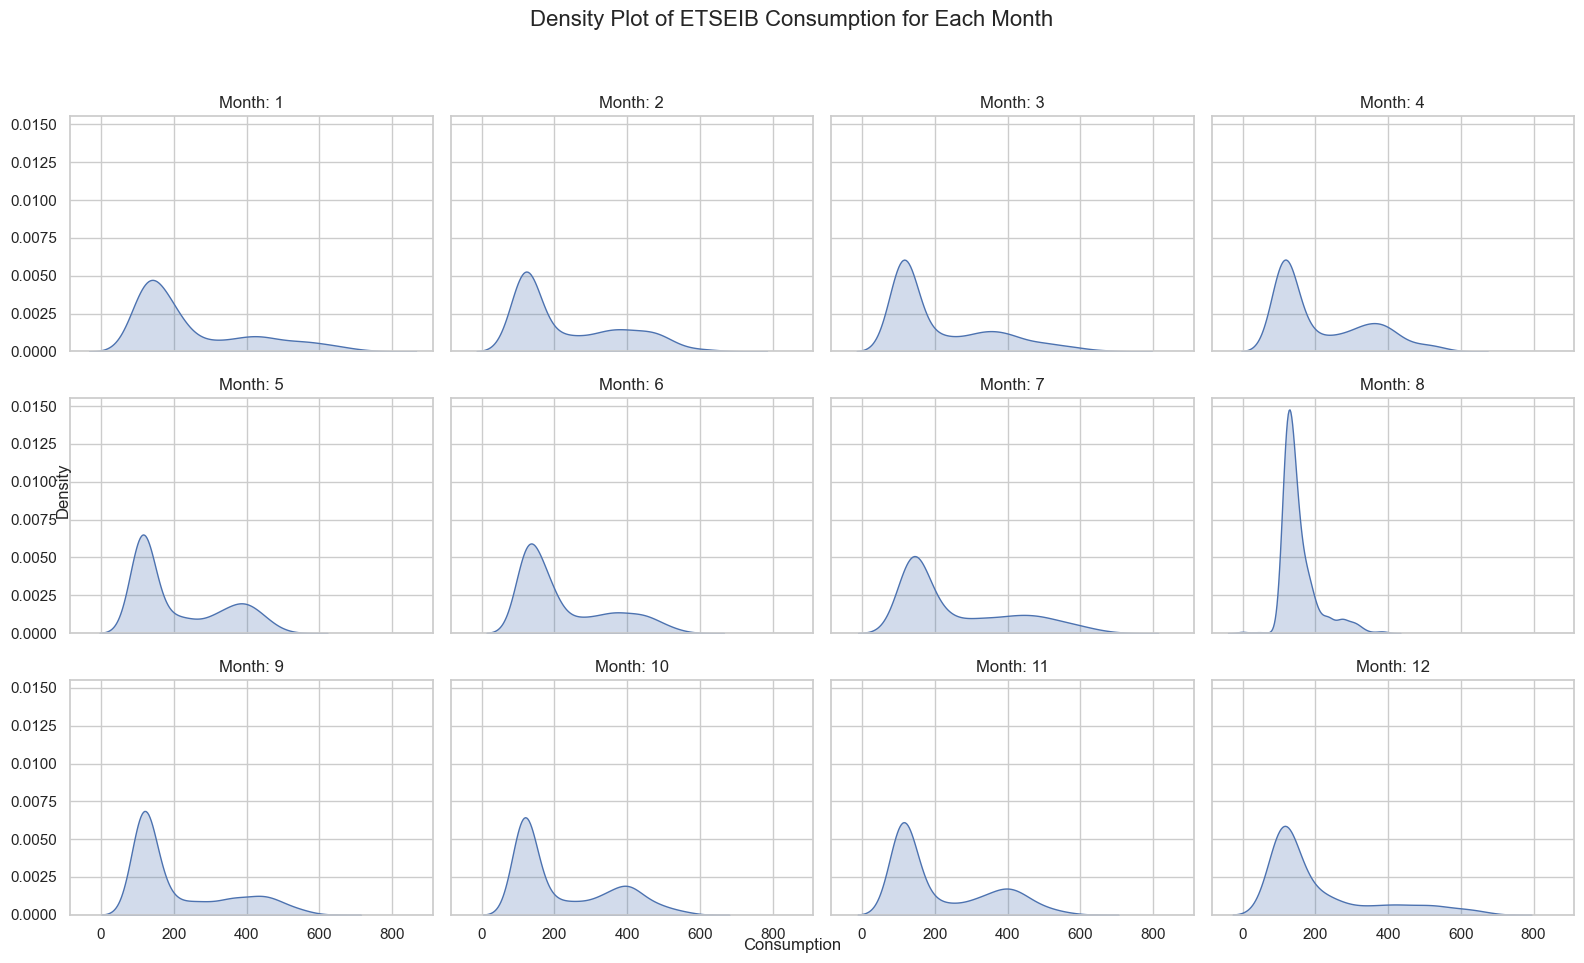

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the figure with 12 subplots (3 rows x 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)
fig.suptitle('Density Plot of ETSEIB Consumption for Each Month', fontsize=16)

# Loop through each month and create a density plot in each subplot
for month in range(1, 13):
    ax = axes[(month-1) // 4, (month-1) % 4]  # Determine subplot position
    sns.kdeplot(
        data=dataset[dataset['month'] == month], 
        x='ETSEIB_consumption', 
        fill=True, 
        common_norm=False, 
        ax=ax
    )
    ax.set_title(f'Month: {month}')  # Title each subplot with the month
    ax.set_xlabel('')  # Remove x-label to keep it clean
    ax.set_ylabel('')  # Remove y-label to keep it clean

# Set common labels
fig.text(0.5, 0.04, 'Consumption', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for titles
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;font-weight: bold; margin-top: 25px;">

Boxplot
    
</div>

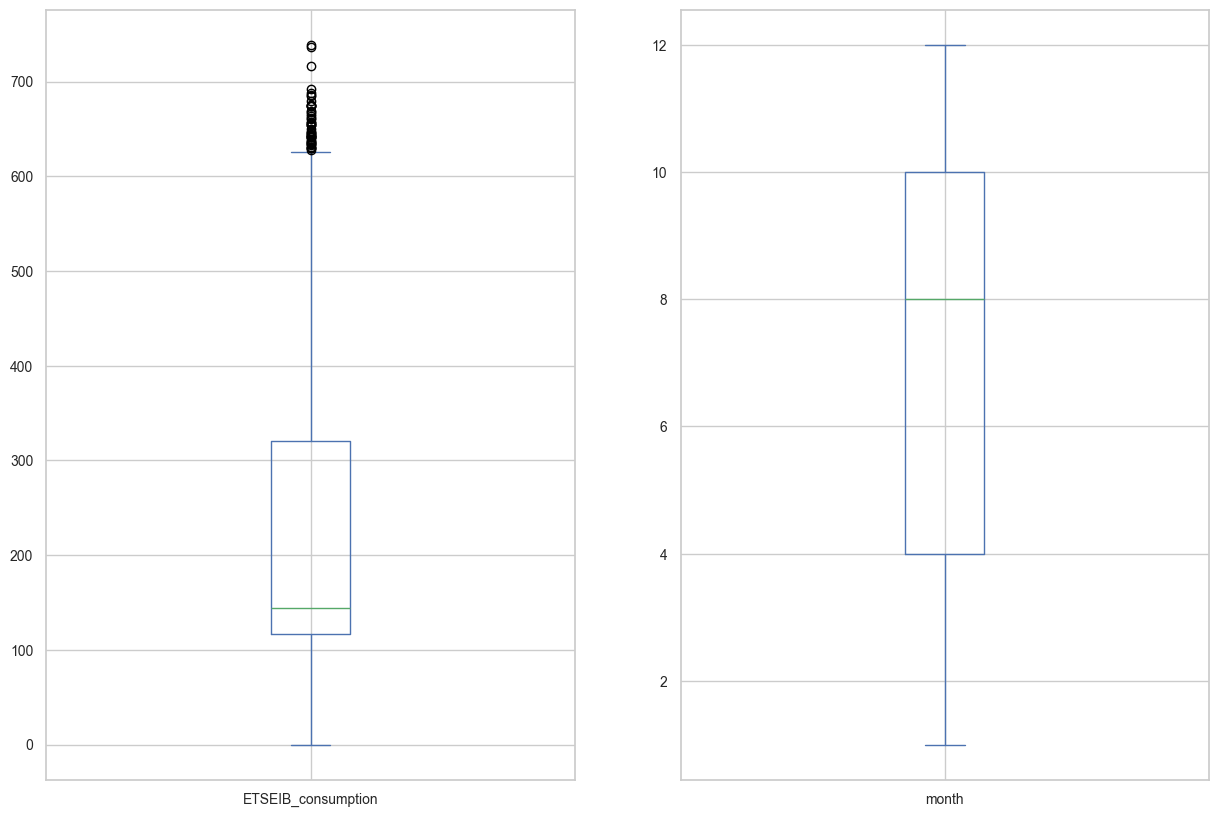

In [16]:

atributos_boxplot = dataset.plot(kind='box', subplots=True, figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)
plt.show()




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;font-weight: bold; margin-top: 25px;">

#### Can we create more new meaninful features? 
    
</div>

> In order to analyze the consumption behavior of the ETSEIB, we will add new input variables to plot the different distributions of the data by month, to see the differences in consumption between weekdays and weekends, etc.

In [17]:

# Extract Hour, Day of Week
dataset.loc[:,'day_of_week'] = dataset['Datetime'].dt.weekday
dataset.loc[:,'hour'] = dataset['Datetime'].dt.hour

C:\Users\stsad\AppData\Local\Temp\ipykernel_20592\3065506801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,'day_of_week'] = dataset['Datetime'].dt.weekday
C:\Users\stsad\AppData\Local\Temp\ipykernel_20592\3065506801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,'hour'] = dataset['Datetime'].dt.hour


In [18]:
dataset

,Datetime,ETSEIB_consumption,month,day_of_week,hour
0,2023-09-01 00:00:00,100,9,4,0
1,2023-09-01 01:00:00,98,9,4,1
2,2023-09-01 02:00:00,97,9,4,2
3,2023-09-01 03:00:00,96,9,4,3
4,2023-09-01 04:00:00,96,9,4,4
...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,1,19
10365,2024-11-05 20:00:00,217,11,1,20
10366,2024-11-05 21:00:00,168,11,1,21
10367,2024-11-05 22:00:00,143,11,1,22


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

Plotting Weekend vs Weekdays Comparison
</div>

> Assuming that weekdays are Monday (0) to Friday (4) and weekends are Saturday (5) and Sunday (6)


C:\Users\stsad\AppData\Local\Temp\ipykernel_20592\3405072595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,'is_weekend'] = dataset['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


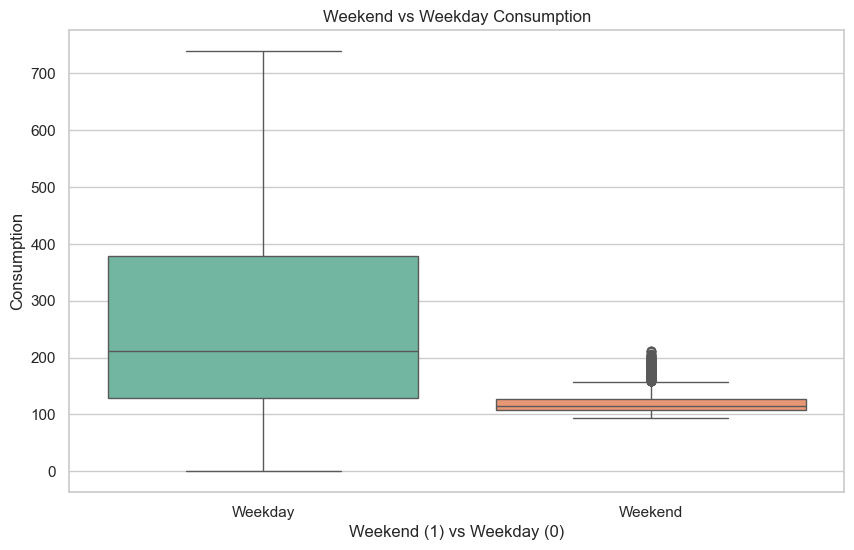

In [ ]:

dataset.loc[:,'is_weekend'] = dataset['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Group the data by 'is_weekend' and plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='ETSEIB_consumption', data=dataset, palette='Set2')
plt.title('Weekend vs Weekday Consumption')
plt.xlabel('Weekend (1) vs Weekday (0)')
plt.ylabel('Consumption')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Plot distribution of data for weekdays and weekends
</div>



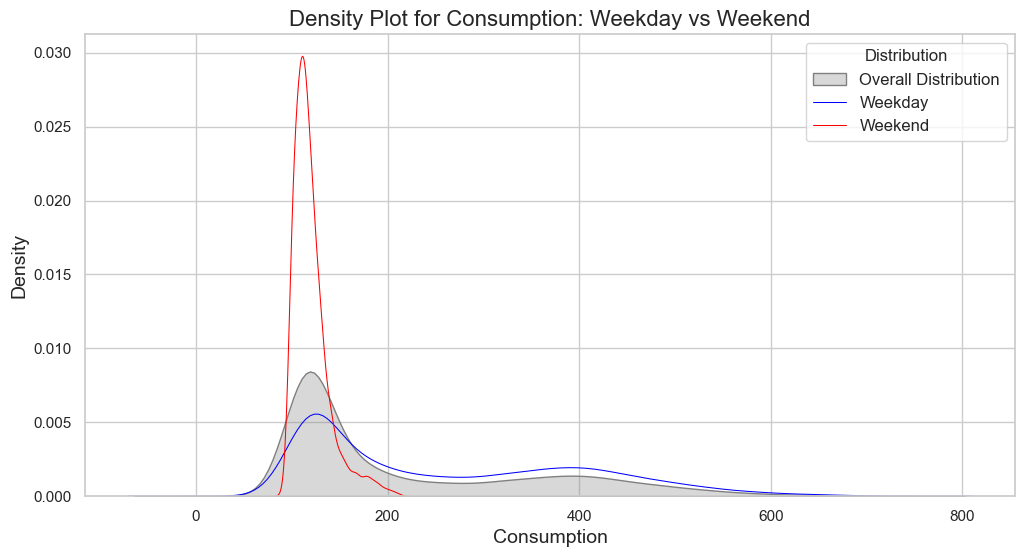

In [20]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting Weekend vs Weekdays Comparison (Density Plot)
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset, x='ETSEIB_consumption', fill=True, color='gray', alpha=0.3, label='Overall Distribution')

# Plot weekday consumption distribution
sns.kdeplot(data=dataset[dataset['is_weekend'] == 0], x='ETSEIB_consumption', 
            fill=False, color='blue', label='Weekday', linewidth = 0.75)

# Plot weekend consumption distribution
sns.kdeplot(data=dataset[dataset['is_weekend'] == 1], x='ETSEIB_consumption', 
            fill=False, color='red', label='Weekend', linewidth = 0.75)

# Title and labels
plt.title('Density Plot for Consumption: Weekday vs Weekend', fontsize=16)
plt.xlabel('Consumption', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Distribution', fontsize=12)  # Adding a legend
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;font-weight: bold; margin-top: 25px;">

DETECT outliers
    
</div>

> * First, we will DETECT when they occur.
> * They will not be removed for now, as we will use lag variables in the future.

In [21]:
from scipy import stats

threshold = 3   # Mark as outlier if Z-score > threshold

dataset_outliers = dataset.copy()

# Detect outliers using Z-score
dataset_outliers['z_score'] = stats.zscore(dataset['ETSEIB_consumption'])
dataset_outliers['outlier'] = np.abs(dataset_outliers['z_score']) > threshold 
dataset_outliers

,Datetime,ETSEIB_consumption,month,day_of_week,hour,is_weekend,z_score,outlier
0,2023-09-01 00:00:00,100,9,4,0,0,-0.877869,False
1,2023-09-01 01:00:00,98,9,4,1,0,-0.892603,False
2,2023-09-01 02:00:00,97,9,4,2,0,-0.899970,False
3,2023-09-01 03:00:00,96,9,4,3,0,-0.907338,False
4,2023-09-01 04:00:00,96,9,4,4,0,-0.907338,False
...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,1,19,0,0.462972,False
10365,2024-11-05 20:00:00,217,11,1,20,0,-0.015900,False
10366,2024-11-05 21:00:00,168,11,1,21,0,-0.376895,False
10367,2024-11-05 22:00:00,143,11,1,22,0,-0.561077,False



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

When do the outliers occur? 
</div>


> Month vs Weekday

> Month vs Hour

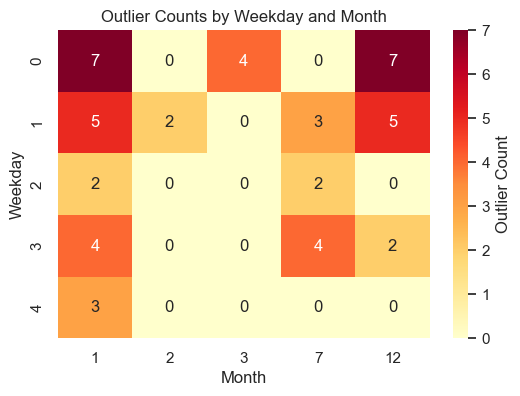

In [22]:
# Month vs Weekday
outlier_counts = dataset_outliers[dataset_outliers['outlier']].groupby(['day_of_week', 'month']).size().unstack(fill_value=0)

# Plot heatmap of outlier counts
plt.figure(figsize=(6, 4))
sns.heatmap(outlier_counts, annot=True, cmap='YlOrRd', cbar_kws={'label': 'Outlier Count'})
plt.title('Outlier Counts by Weekday and Month')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.show()

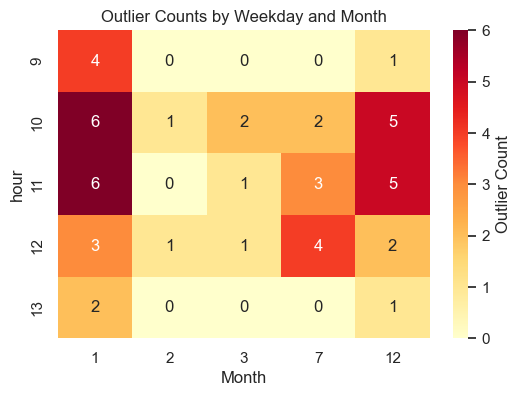

In [23]:
# Month vs Hour
outlier_counts = dataset_outliers[dataset_outliers['outlier']].groupby(['hour', 'month']).size().unstack(fill_value=0) 

#unstack will create pivot of columns(month) and rows (hour)

# Plot heatmap of outlier counts
plt.figure(figsize=(6, 4))
sns.heatmap(outlier_counts, annot=True, cmap='YlOrRd', cbar_kws={'label': 'Outlier Count'})
plt.title('Outlier Counts by Weekday and Month')
plt.xlabel('Month')
plt.ylabel('hour')
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;font-weight: bold; margin-top: 25px;">

Correlation matrix
    
</div>

In [24]:
dataset['Lag_1_day'] = dataset['ETSEIB_consumption'].shift(24)  # Lag of 24 hours (1 day)
dataset['Lag_2_days'] = dataset['ETSEIB_consumption'].shift(48)  # Lag of 48 hours (2 days)
dataset


C:\Users\stsad\AppData\Local\Temp\ipykernel_20592\995891597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lag_1_day'] = dataset['ETSEIB_consumption'].shift(24)  # Lag of 24 hours (1 day)
C:\Users\stsad\AppData\Local\Temp\ipykernel_20592\995891597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lag_2_days'] = dataset['ETSEIB_consumption'].shift(48)  # Lag of 48 hours (2 days)


,Datetime,ETSEIB_consumption,month,day_of_week,hour,is_weekend,Lag_1_day,Lag_2_days
0,2023-09-01 00:00:00,100,9,4,0,0,NaN,NaN
1,2023-09-01 01:00:00,98,9,4,1,0,NaN,NaN
2,2023-09-01 02:00:00,97,9,4,2,0,NaN,NaN
3,2023-09-01 03:00:00,96,9,4,3,0,NaN,NaN
4,2023-09-01 04:00:00,96,9,4,4,0,NaN,NaN
...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,1,19,0,176.0,114.0
10365,2024-11-05 20:00:00,217,11,1,20,0,162.0,113.0
10366,2024-11-05 21:00:00,168,11,1,21,0,152.0,111.0
10367,2024-11-05 22:00:00,143,11,1,22,0,133.0,110.0


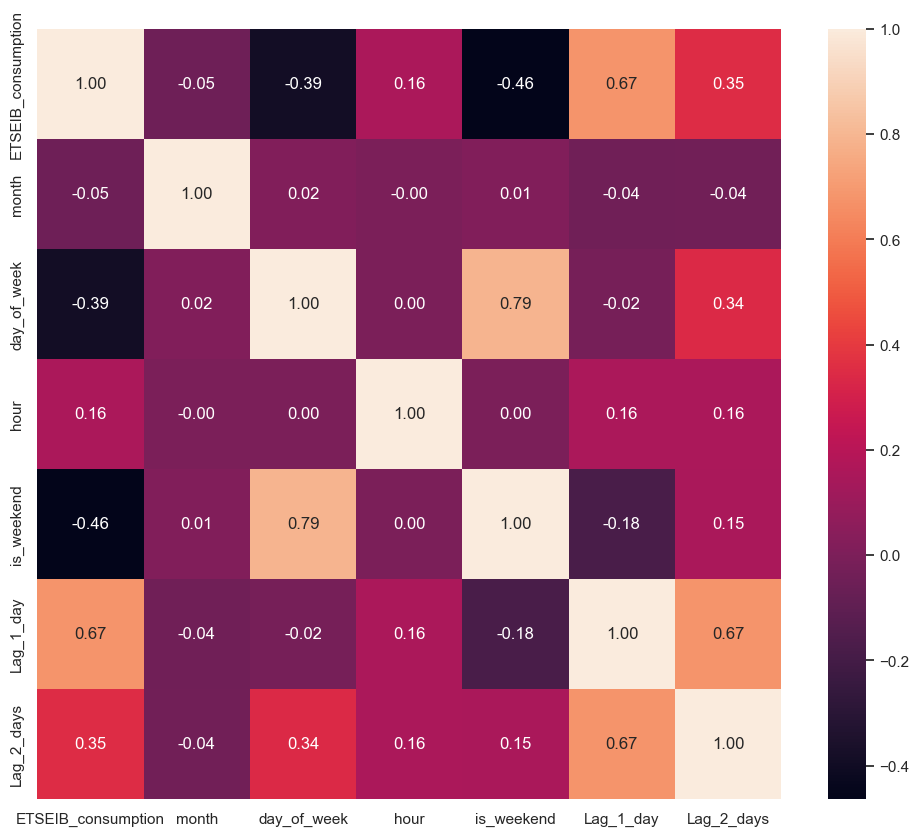

In [25]:
### Seaborn visualization library
import seaborn as sns

# Calculate the correlation matrix
corr = dataset.iloc[:,1:].corr(method='pearson') 

# Plot Heat Map,
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [26]:
dataset.dropna(inplace=True)
dataset

C:\Users\stsad\AppData\Local\Temp\ipykernel_20592\2012072806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


,Datetime,ETSEIB_consumption,month,day_of_week,hour,is_weekend,Lag_1_day,Lag_2_days
48,2023-09-03 00:00:00,99,9,6,0,1,109.0,100.0
49,2023-09-03 01:00:00,100,9,6,1,1,108.0,98.0
50,2023-09-03 02:00:00,100,9,6,2,1,104.0,97.0
51,2023-09-03 03:00:00,99,9,6,3,1,103.0,96.0
52,2023-09-03 04:00:00,98,9,6,4,1,101.0,96.0
...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,1,19,0,176.0,114.0
10365,2024-11-05 20:00:00,217,11,1,20,0,162.0,113.0
10366,2024-11-05 21:00:00,168,11,1,21,0,152.0,111.0
10367,2024-11-05 22:00:00,143,11,1,22,0,133.0,110.0





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 3. Data Preparation
    
</div>

> * Data cleaning
> * Feature selection (create/delete/select)


In [27]:
# Set the datetime column as index
dataset_v0 = dataset.set_index('Datetime')
dataset_v0

,ETSEIB_consumption,month,day_of_week,hour,is_weekend,Lag_1_day,Lag_2_days
Datetime,,,,,,,
2023-09-03 00:00:00,99,9,6,0,1,109.0,100.0
2023-09-03 01:00:00,100,9,6,1,1,108.0,98.0
2023-09-03 02:00:00,100,9,6,2,1,104.0,97.0
2023-09-03 03:00:00,99,9,6,3,1,103.0,96.0
2023-09-03 04:00:00,98,9,6,4,1,101.0,96.0
...,...,...,...,...,...,...,...
2024-11-05 19:00:00,282,11,1,19,0,176.0,114.0
2024-11-05 20:00:00,217,11,1,20,0,162.0,113.0
2024-11-05 21:00:00,168,11,1,21,0,152.0,111.0





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 4. Split the data
    
</div>

> * Divide the data into attributes: X (features) and tags: y (target).
> * Scale the data


In [28]:
# Features X ; Target y 
X = dataset_v0.drop(['ETSEIB_consumption'], axis=1) 
y = dataset_v0['ETSEIB_consumption']

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


The data are divided into training data ``X_train``, ``y_train``, validation data ``X_val``, ``y_val`` and test data ``X_test``, ``y_test``.
</div>



In [29]:
from sklearn.model_selection import train_test_split

test_size = 0.15  # percentage of the input data that I will use to validate the model

# I divide the data into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                                                    shuffle=False)


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 5. Model building and evaluation
    
</div>

> First, let's check the vailable [Scoring Metrics in ScikitLearn](https://scikit-learn.org/1.5/api/sklearn.metrics.html)



In [30]:
from sklearn.metrics import get_scorer_names
print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [31]:

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor


# Define the number of folds and error metrics
num_folds = 5
error_metrics = {'neg_root_mean_squared_error', 'r2'}


# Define a dictionary with models
models = {
    ('MLP', MLPRegressor()),
    ('RFR', RandomForestRegressor()),
    ('SVR', SVR()),
    ('AdaB', AdaBoostRegressor()),
    ('GBR', GradientBoostingRegressor()),  # Gradient Boosting Regressor
    ('DTR', DecisionTreeRegressor()),  # Decision Tree Regressor
    ('XGB', XGBRegressor()),  # XGBoost Regressor
    ('LR', LinearRegression()),  # Linear Regression
    ('EN', ElasticNet())  # ElasticNet Regressor
}




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">



Each of the models is trained, the results are saved and compared visually.
    
</div>


####### Evaluation metric:  r2

Training model: SVR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: SVR, r2 Mean: 0.3854, Std: 0.0518


Training model: EN with r2...
Performing TimeSeriesSplit with 5 folds...
Model: EN, r2 Mean: 0.6038, Std: 0.0335


Training model: XGB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: XGB, r2 Mean: 0.7935, Std: 0.1210


Training model: GBR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, r2 Mean: 0.8371, Std: 0.0621


Training model: LR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: LR, r2 Mean: 0.6078, Std: 0.0332


Training model: AdaB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, r2 Mean: 0.7408, Std: 0.0611


Training model: RFR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: RFR, r2 Mean: 0.8304, Std: 0.0807


Training model: DTR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: DTR, r2 Mean: 0.7414, Std: 0.1047


Training model: MLP with r2...
Per

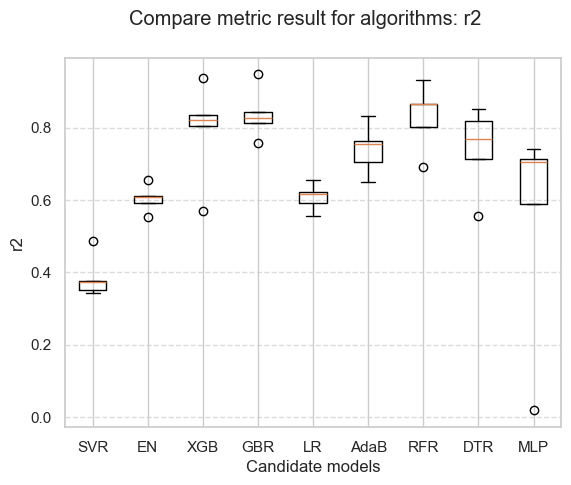

####### Evaluation metric:  neg_root_mean_squared_error

Training model: SVR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: SVR, neg_root_mean_squared_error Mean: -107.8239, Std: 11.0509


Training model: EN with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: EN, neg_root_mean_squared_error Mean: -86.4455, Std: 7.4314


Training model: XGB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: XGB, neg_root_mean_squared_error Mean: -60.2400, Std: 21.0739


Training model: GBR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, neg_root_mean_squared_error Mean: -54.1235, Std: 13.4392


Training model: LR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: LR, neg_root_mean_squared_error Mean: -85.9850, Std: 7.1503


Training model: AdaB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds..

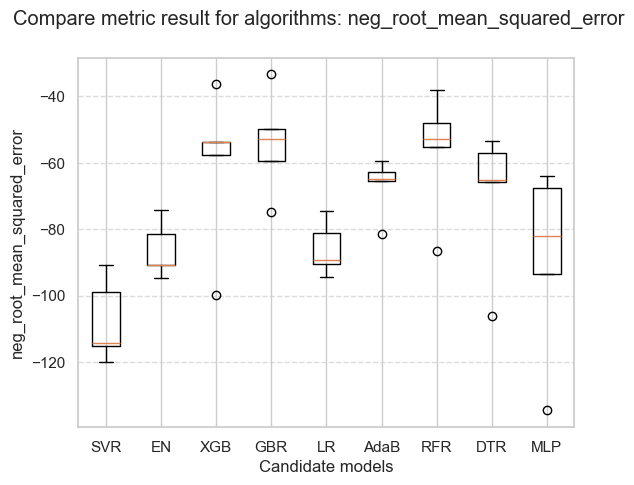

In [32]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress specific warnings from sklearn (like ConvergenceWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('####### Evaluation metric: ', scoring)
    
    for name, model in models:
        print(f'\nTraining model: {name} with {scoring}...')
        cross_validation = TimeSeriesSplit(n_splits=num_folds)
        
        # Start the cross-validation process and print verbose output
        print(f"Performing TimeSeriesSplit with {num_folds} folds...")
        
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        
        print(f"Model: {name}, {scoring} Mean: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}\n")

        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    # Show a grid for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

    results = []



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 6. Best Model Hyperparameters Adjustment
    
</div>

> Steps to perform the hyperadjustment of the parameters:
> * Specify the model to be adjusted
> * Specify a metric to optimize
> * Define the search hyperparameter ranges: *params*
> * Assign a validation method: *KFold*
> * Find the Hyperparameters with the validation data: *X_val*



In [33]:
model = RandomForestRegressor()
scoring='r2'
params = {
    # Number of trees in random forest
    'n_estimators': [100, 500],  # default=100
     # Maximum number of levels in tree
#     'max_depth': [2, None],  #deafult = None
     # Method of selecting samples for training each tree
}


# Search for the best combination of hyperparameters
cross_validation = TimeSeriesSplit(n_splits=5)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=my_cv, verbose=3)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..................n_estimators=100;, score=0.942 total time=   0.0s
[CV 2/5] END ..................n_estimators=100;, score=0.652 total time=   0.0s
[CV 3/5] END ..................n_estimators=100;, score=0.557 total time=   0.1s
[CV 4/5] END ..................n_estimators=100;, score=0.022 total time=   0.1s
[CV 5/5] END ..................n_estimators=100;, score=0.472 total time=   0.1s
[CV 1/5] END ..................n_estimators=500;, score=0.939 total time=   0.3s
[CV 2/5] END ..................n_estimators=500;, score=0.638 total time=   0.5s
[CV 3/5] END ..................n_estimators=500;, score=0.565 total time=   0.7s
[CV 4/5] END ..................n_estimators=500;, score=0.025 total time=   0.9s
[CV 5/5] END ..................n_estimators=500;, score=0.469 total time=   1.1s
Best result: 0.529102 using the following hyperparameters {'n_estimators': 100}





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 7. Final evaluation of the model
    
</div>

> * Finally, the model is built.
> *     
The ``fit()`` model is trained with the optimal hyperparameters found in the previous section and then the predictions are made. 
> * Use the ``X_test`` data to make the predictions



In [34]:
final_model_v0 = RandomForestRegressor(n_estimators=100, max_depth=None) ## Write here the optimal hyperparameters found
final_model_v0.fit(X_train,y_train)  # Model training 
y_predict_v0 = final_model_v0.predict(X_test)  # prediction calculation




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


Calculate the Evaluation Metrics for this final model
    
</div>


In [35]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² (R-squared) score
r2 = r2_score(y_test, y_predict_v0)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_predict_v0, squared=False)

# Print both the R² and RMSE scores
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8524
RMSE: 47.3489




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


Plot the predictions ``y_predict`` vs the real values ``y_test``
    
</div>


In [36]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the trace for the actual consumption (True Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='True Values',
                         line=dict(color='blue', width=1.5)))

# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_v0, mode='lines', name='Predicted Values V0',
                         line=dict(color='red', width=1.5, dash='dot')))  # 'dot' for less separated dashes


# Update layout for a more beautiful plot
fig.update_layout(
    title='True vs Predicted ETSEIB Consumption',
    xaxis_title='Date/Time',
    yaxis_title='Consumption (kWh)',
    template='plotly',  # dark theme, can change to 'plotly' for light theme
    hovermode='x unified',  # hover over to show values for both lines at a time
    legend=dict(
        x=0.01, y=0.99,  # position of legend
        traceorder='normal',
        font=dict(family="Arial", size=12, color="white"),
        bgcolor='rgba(0, 0, 0, 0.3)',
        bordercolor='white',
        borderwidth=1
    ),
   
   
)

# Show the plot
fig.show()

---

<div style="background-color: #ffffe0; padding: 15px; border-radius: 5px;">

# **Now, let's try to improve the model. We will create a version 1**

</div>

> * Scale the data
> * Add more lag variables
> * Transform to one hot encoding

---




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 3. Data Preparation
    
</div>

> * Data cleaning
> * Feature selection (create/delete/select)


In [37]:
dataset

,Datetime,ETSEIB_consumption,month,day_of_week,hour,is_weekend,Lag_1_day,Lag_2_days
48,2023-09-03 00:00:00,99,9,6,0,1,109.0,100.0
49,2023-09-03 01:00:00,100,9,6,1,1,108.0,98.0
50,2023-09-03 02:00:00,100,9,6,2,1,104.0,97.0
51,2023-09-03 03:00:00,99,9,6,3,1,103.0,96.0
52,2023-09-03 04:00:00,98,9,6,4,1,101.0,96.0
...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,1,19,0,176.0,114.0
10365,2024-11-05 20:00:00,217,11,1,20,0,162.0,113.0
10366,2024-11-05 21:00:00,168,11,1,21,0,152.0,111.0
10367,2024-11-05 22:00:00,143,11,1,22,0,133.0,110.0


In [38]:
# Apply one-hot encoding to the 'hour' column and day_of_the_week
dataset_dummies = pd.get_dummies(dataset, columns=['day_of_week'], prefix='day_of_week')
dataset_dummies = pd.get_dummies(dataset_dummies, columns=['hour'], prefix='hour')



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;font-weight: bold; margin-top: 25px;">

Create lag variables. Why are they important?
    
</div>

> * Capturing Temporal Dependence: Many datasets, especially time series data, exhibit autocorrelation—where past values of a variable influence its future values. By incorporating lag variables, regression models can account for this temporal relationship.
> * Improving Forecasting: In time series forecasting, lag variables help to make predictions based on prior values. This is particularly important for variables that follow cyclical patterns or trends over time.

In [39]:
# Create lag variables for the previous days 
dataset_dummies['Lag_7_days'] = dataset_dummies['ETSEIB_consumption'].shift(168)  # Lag of 48 hours (2 days)
dataset_dummies['Lag_14_days'] = dataset_dummies['ETSEIB_consumption'].shift(336)  # Lag of 48 hours (2 days)
dataset_dummies['Lag_21_days'] = dataset_dummies['ETSEIB_consumption'].shift(504)  # Lag of 48 hours (2 days)

In [40]:
dataset_dummies

,Datetime,ETSEIB_consumption,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days
48,2023-09-03 00:00:00,99,9,1,109.0,100.0,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
49,2023-09-03 01:00:00,100,9,1,108.0,98.0,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
50,2023-09-03 02:00:00,100,9,1,104.0,97.0,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
51,2023-09-03 03:00:00,99,9,1,103.0,96.0,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
52,2023-09-03 04:00:00,98,9,1,101.0,96.0,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,0,176.0,114.0,False,True,False,False,...,False,False,True,False,False,False,False,249.0,213.0,216.0
10365,2024-11-05 20:00:00,217,11,0,162.0,113.0,False,True,False,False,...,False,False,False,True,False,False,False,194.0,160.0,171.0
10366,2024-11-05 21:00:00,168,11,0,152.0,111.0,False,True,False,False,...,False,False,False,False,True,False,False,156.0,133.0,144.0
10367,2024-11-05 22:00:00,143,11,0,133.0,110.0,False,True,False,False,...,False,False,False,False,False,True,False,132.0,123.0,132.0


In [41]:
dataset_dummies.dropna(inplace=True)

In [42]:
dataset_dummies

,Datetime,ETSEIB_consumption,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days
552,2023-09-24 00:00:00,103,9,1,112.0,113.0,False,False,False,False,...,False,False,False,False,False,False,False,102.0,103.0,99.0
553,2023-09-24 01:00:00,103,9,1,109.0,113.0,False,False,False,False,...,False,False,False,False,False,False,False,100.0,102.0,100.0
554,2023-09-24 02:00:00,104,9,1,105.0,112.0,False,False,False,False,...,False,False,False,False,False,False,False,100.0,103.0,100.0
555,2023-09-24 03:00:00,101,9,1,103.0,105.0,False,False,False,False,...,False,False,False,False,False,False,False,99.0,104.0,99.0
556,2023-09-24 04:00:00,101,9,1,101.0,103.0,False,False,False,False,...,False,False,False,False,False,False,False,98.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,0,176.0,114.0,False,True,False,False,...,False,False,True,False,False,False,False,249.0,213.0,216.0
10365,2024-11-05 20:00:00,217,11,0,162.0,113.0,False,True,False,False,...,False,False,False,True,False,False,False,194.0,160.0,171.0
10366,2024-11-05 21:00:00,168,11,0,152.0,111.0,False,True,False,False,...,False,False,False,False,True,False,False,156.0,133.0,144.0
10367,2024-11-05 22:00:00,143,11,0,133.0,110.0,False,True,False,False,...,False,False,False,False,False,True,False,132.0,123.0,132.0


In [43]:
# Set the datetime column as index
dataset_v1 = dataset_dummies.set_index('Datetime')
dataset_v1

,ETSEIB_consumption,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-24 00:00:00,103,9,1,112.0,113.0,False,False,False,False,False,...,False,False,False,False,False,False,False,102.0,103.0,99.0
2023-09-24 01:00:00,103,9,1,109.0,113.0,False,False,False,False,False,...,False,False,False,False,False,False,False,100.0,102.0,100.0
2023-09-24 02:00:00,104,9,1,105.0,112.0,False,False,False,False,False,...,False,False,False,False,False,False,False,100.0,103.0,100.0
2023-09-24 03:00:00,101,9,1,103.0,105.0,False,False,False,False,False,...,False,False,False,False,False,False,False,99.0,104.0,99.0
2023-09-24 04:00:00,101,9,1,101.0,103.0,False,False,False,False,False,...,False,False,False,False,False,False,False,98.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-05 19:00:00,282,11,0,176.0,114.0,False,True,False,False,False,...,False,False,True,False,False,False,False,249.0,213.0,216.0
2024-11-05 20:00:00,217,11,0,162.0,113.0,False,True,False,False,False,...,False,False,False,True,False,False,False,194.0,160.0,171.0
2024-11-05 21:00:00,168,11,0,152.0,111.0,False,True,False,False,False,...,False,False,False,False,True,False,False,156.0,133.0,144.0


In [44]:
dataset_v1

,ETSEIB_consumption,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-24 00:00:00,103,9,1,112.0,113.0,False,False,False,False,False,...,False,False,False,False,False,False,False,102.0,103.0,99.0
2023-09-24 01:00:00,103,9,1,109.0,113.0,False,False,False,False,False,...,False,False,False,False,False,False,False,100.0,102.0,100.0
2023-09-24 02:00:00,104,9,1,105.0,112.0,False,False,False,False,False,...,False,False,False,False,False,False,False,100.0,103.0,100.0
2023-09-24 03:00:00,101,9,1,103.0,105.0,False,False,False,False,False,...,False,False,False,False,False,False,False,99.0,104.0,99.0
2023-09-24 04:00:00,101,9,1,101.0,103.0,False,False,False,False,False,...,False,False,False,False,False,False,False,98.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-05 19:00:00,282,11,0,176.0,114.0,False,True,False,False,False,...,False,False,True,False,False,False,False,249.0,213.0,216.0
2024-11-05 20:00:00,217,11,0,162.0,113.0,False,True,False,False,False,...,False,False,False,True,False,False,False,194.0,160.0,171.0
2024-11-05 21:00:00,168,11,0,152.0,111.0,False,True,False,False,False,...,False,False,False,False,True,False,False,156.0,133.0,144.0


In [45]:
dataset_v1

,ETSEIB_consumption,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-24 00:00:00,103,9,1,112.0,113.0,False,False,False,False,False,...,False,False,False,False,False,False,False,102.0,103.0,99.0
2023-09-24 01:00:00,103,9,1,109.0,113.0,False,False,False,False,False,...,False,False,False,False,False,False,False,100.0,102.0,100.0
2023-09-24 02:00:00,104,9,1,105.0,112.0,False,False,False,False,False,...,False,False,False,False,False,False,False,100.0,103.0,100.0
2023-09-24 03:00:00,101,9,1,103.0,105.0,False,False,False,False,False,...,False,False,False,False,False,False,False,99.0,104.0,99.0
2023-09-24 04:00:00,101,9,1,101.0,103.0,False,False,False,False,False,...,False,False,False,False,False,False,False,98.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-05 19:00:00,282,11,0,176.0,114.0,False,True,False,False,False,...,False,False,True,False,False,False,False,249.0,213.0,216.0
2024-11-05 20:00:00,217,11,0,162.0,113.0,False,True,False,False,False,...,False,False,False,True,False,False,False,194.0,160.0,171.0
2024-11-05 21:00:00,168,11,0,152.0,111.0,False,True,False,False,False,...,False,False,False,False,True,False,False,156.0,133.0,144.0



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;font-weight: bold; margin-top: 25px;">

Plot the correlation matrix again
    
</div>

> A correlation matrix is a table that shows the pairwise correlation coefficients between a set of variables (or features) in a dataset. Each element in the matrix represents the correlation between two features.

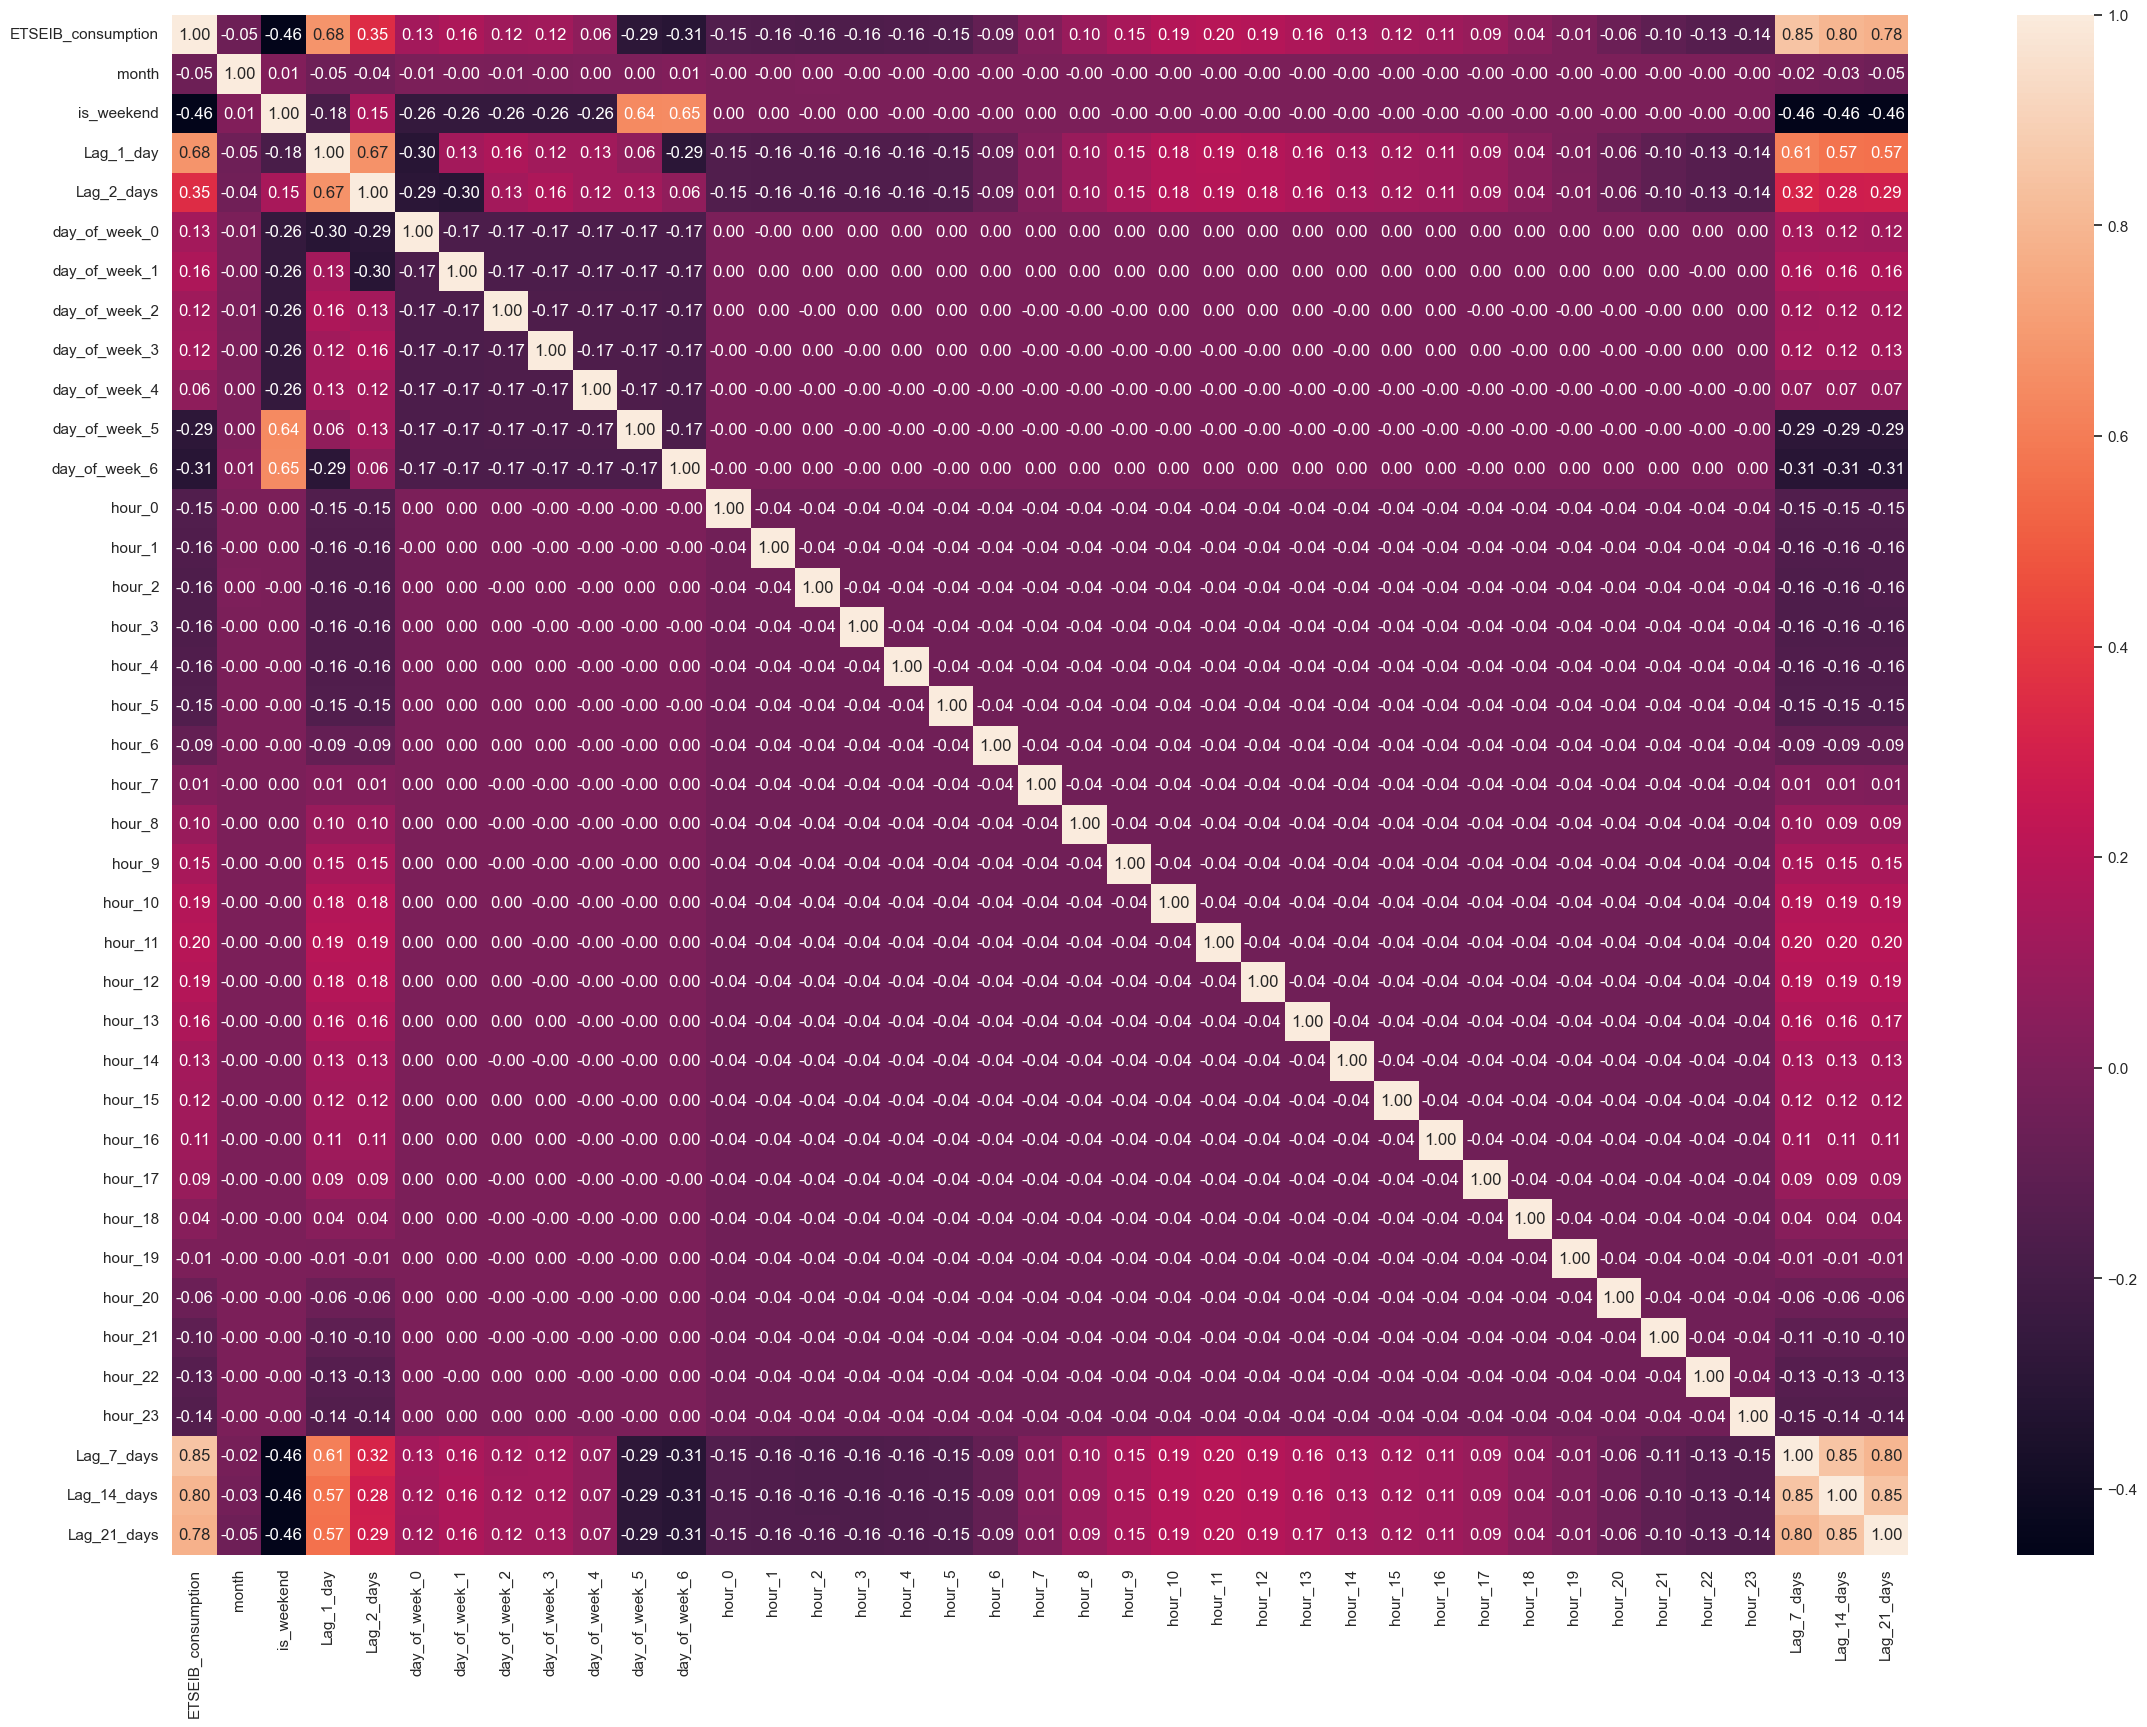

In [46]:
### Seaborn visualization library
import seaborn as sns

# Calculate the correlation matrix
corr = dataset_v1.corr(method='pearson') 

# Plot Heat Map,
f, ax = plt.subplots(figsize=(28, 20))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 4. Split the data
    
</div>

> * Divide the data into attributes: X (features) and tags: y (target).
> * Scale the data


In [47]:
# Features X ; Target y 
X = dataset_v1.drop(['ETSEIB_consumption'], axis=1) 
y = dataset_v1['ETSEIB_consumption']


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


The data are divided into training data ``X_train``, ``y_train``, validation data ``X_val``, ``y_val`` and test data ``X_test``, ``y_test``.
</div>



In [48]:
from sklearn.model_selection import train_test_split

test_size = 0.15  # percentage of the input data that I will use to validate the model

# I divide the data into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                                                    shuffle=False)

In [49]:
X_train

,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-24 00:00:00,9,1,112.0,113.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,102.0,103.0,99.0
2023-09-24 01:00:00,9,1,109.0,113.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,100.0,102.0,100.0
2023-09-24 02:00:00,9,1,105.0,112.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,100.0,103.0,100.0
2023-09-24 03:00:00,9,1,103.0,105.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,99.0,104.0,99.0
2023-09-24 04:00:00,9,1,101.0,103.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,98.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15 07:00:00,7,0,130.0,142.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,273.0,282.0,162.0
2024-07-15 08:00:00,7,0,134.0,137.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,369.0,333.0,164.0
2024-07-15 09:00:00,7,0,138.0,135.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,463.0,391.0,171.0





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Let's scale the dataset
    
</div>


The data is scaled using the ``MinMaxScaler()`` method, which scales and translates each attribute individually such that it is within the range [0, 1]. This needs to be done when the scales of the attributes are different (e.g. radiation [0, 650], wind speed [2, 15]).


* ``MinMaxScaler()``: This scaler will normalize the values of the features to be within a specific range, typically [0, 1]. It does this by subtracting the minimum value and dividing by the range (max - min).
* ``fit_transform(X_train)``: This step calculates the Min and Max values from the X_train data and applies the scaling transformation.
* ``transform(X_val) and transform(X_test)``: These steps scale the validation and test sets using the same scaling parameters (Min and Max) derived from the training set, ensuring that data leakage doesn't occur.

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the MinMaxScaler
scaler_v1 = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler_v1.fit_transform(X_train)

# Use the same scaler to transform the validation and test data (do not fit again)
X_val_scaled = scaler_v1.transform(X_val)
X_test_scaled = scaler_v1.transform(X_test)




Now, X_train_scaled, X_val_scaled, X_test_scaled are scaled versions of the original datasets.

In [51]:
X_train_scaled

array([[ 0.768188  ,  1.57406643, -0.79679788, ..., -0.866341  ,
        -0.85270601, -0.87725268],
       [ 0.768188  ,  1.57406643, -0.81821272, ..., -0.88065408,
        -0.85982731, -0.87013467],
       [ 0.768188  ,  1.57406643, -0.84676586, ..., -0.88065408,
        -0.85270601, -0.87013467],
       ...,
       [ 0.23146309, -0.6352972 , -0.61120252, ...,  1.71716994,
         1.1982281 , -0.36475605],
       [ 0.23146309, -0.6352972 , -0.56837282, ...,  1.996275  ,
         1.49732266, -0.32204799],
       [ 0.23146309, -0.6352972 , -0.51126656, ...,  2.25391044,
         1.61126344, -0.28645795]])


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 5. Model building and evaluation
    
</div>

> First, let's check the vailable [Scoring Metrics in ScikitLearn](https://scikit-learn.org/1.5/api/sklearn.metrics.html)



In [52]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor


# Define the number of folds and error metrics
num_folds = 5
error_metrics = {'neg_root_mean_squared_error', 'r2'}


# Define a dictionary with models
models = {
    ('MLP', MLPRegressor()),
    ('RFR', RandomForestRegressor()),
    ('SVR', SVR()),
    ('AdaB', AdaBoostRegressor()),
    ('GBR', GradientBoostingRegressor()),  # Gradient Boosting Regressor
    ('DTR', DecisionTreeRegressor()),  # Decision Tree Regressor
    ('XGB', XGBRegressor()),  # XGBoost Regressor
    ('LR', LinearRegression()),  # Linear Regression
    ('EN', ElasticNet())  # ElasticNet Regressor
}




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">



Each of the models is trained, the results are saved and compared visually.
    
</div>


####### Evaluation metric:  r2

Training model: GBR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, r2 Mean: 0.8084, Std: 0.0967


Training model: AdaB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, r2 Mean: 0.6839, Std: 0.0672


Training model: EN with r2...
Performing TimeSeriesSplit with 5 folds...
Model: EN, r2 Mean: 0.7892, Std: 0.0488


Training model: LR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: LR, r2 Mean: 0.7963, Std: 0.0553


Training model: RFR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: RFR, r2 Mean: 0.8270, Std: 0.0764


Training model: XGB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: XGB, r2 Mean: 0.8219, Std: 0.0516


Training model: SVR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: SVR, r2 Mean: 0.4844, Std: 0.2695


Training model: DTR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: DTR, r2 Mean: 0.7133, Std: 0.0888


Training model: MLP with r2...
Per

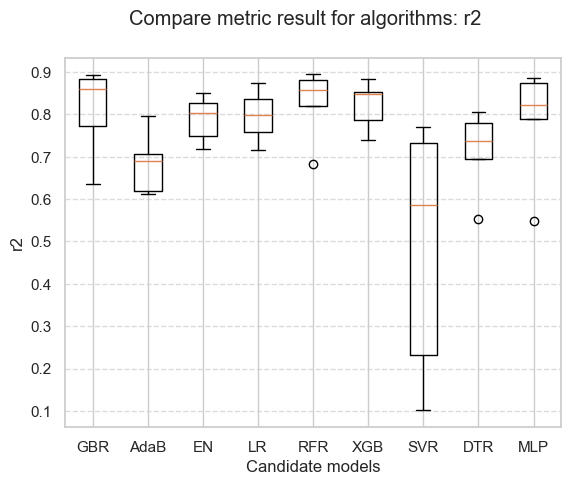

####### Evaluation metric:  neg_root_mean_squared_error

Training model: GBR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, neg_root_mean_squared_error Mean: -60.1537, Std: 18.3450


Training model: AdaB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, neg_root_mean_squared_error Mean: -83.8113, Std: 6.1977


Training model: EN with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: EN, neg_root_mean_squared_error Mean: -63.8597, Std: 11.1393


Training model: LR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: LR, neg_root_mean_squared_error Mean: -62.6176, Std: 12.0359


Training model: RFR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: RFR, neg_root_mean_squared_error Mean: -56.8306, Std: 15.4386


Training model: XGB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds.

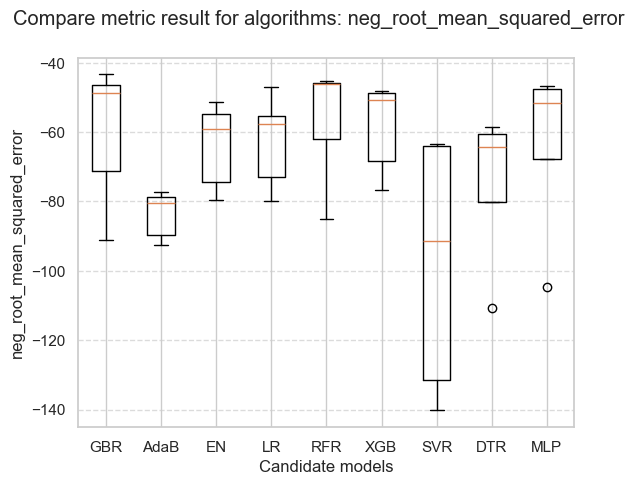

In [53]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress specific warnings from sklearn (like ConvergenceWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('####### Evaluation metric: ', scoring)
    
    for name, model in models:
        print(f'\nTraining model: {name} with {scoring}...')
        cross_validation = TimeSeriesSplit(n_splits=num_folds)
        
        # Start the cross-validation process and print verbose output
        print(f"Performing TimeSeriesSplit with {num_folds} folds...")
        
        cv_results = cross_val_score(model, X_train_scaled, y_train, cv=cross_validation, scoring=scoring)
        
        print(f"Model: {name}, {scoring} Mean: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}\n")

        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    # Show a grid for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

    results = []



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 7. Best Model Hyperparameters Adjustment
    
</div>

> Steps to perform the hyperadjustment of the parameters:
> * Specify the model to be adjusted
> * Specify a metric to optimize
> * Define the search hyperparameter ranges: *params*
> * Assign a validation method: *KFold*
> * Find the Hyperparameters with the validation data: *X_val*



In [54]:
model = RandomForestRegressor()
scoring='r2'
params = {
    # Number of trees in random forest
    'n_estimators': [100, 500],  # default=100
     # Maximum number of levels in tree
#     'max_depth': [2, None],  #deafult = None
     # Method of selecting samples for training each tree
}


# Search for the best combination of hyperparameters
cross_validation = TimeSeriesSplit(n_splits=5)
my_cv = cross_validation.split(X_val_scaled)
gsearch = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=my_cv, verbose=3)
gsearch.fit(X_val_scaled, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..................n_estimators=100;, score=0.908 total time=   0.0s
[CV 2/5] END .................n_estimators=100;, score=-0.829 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.397 total time=   0.2s
[CV 4/5] END ..................n_estimators=100;, score=0.218 total time=   0.3s
[CV 5/5] END ..................n_estimators=100;, score=0.338 total time=   0.4s
[CV 1/5] END ..................n_estimators=500;, score=0.911 total time=   0.5s
[CV 2/5] END .................n_estimators=500;, score=-1.071 total time=   1.0s
[CV 3/5] END ..................n_estimators=500;, score=0.405 total time=   1.4s
[CV 4/5] END ..................n_estimators=500;, score=0.206 total time=   1.8s
[CV 5/5] END ..................n_estimators=500;, score=0.355 total time=   2.3s
Best result: 0.206408 using the following hyperparameters {'n_estimators': 100}





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 8. Final evaluation of the model
    
</div>

> * Finally, the model is built.
> *     
The ``fit()`` model is trained with the optimal hyperparameters found in the previous section and then the predictions are made. 
> * Use the ``X_test`` data to make the predictions



In [55]:
final_model_v1 = RandomForestRegressor(n_estimators=100) ## Write here the optimal hyperparameters found
final_model_v1.fit(X_train_scaled,y_train)  # Model training 
y_predict_v1 = final_model_v1.predict(X_test_scaled)  # prediction calculation




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


Calculate the Evaluation Metrics for this final model
    
</div>


In [56]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² (R-squared) score
r2 = r2_score(y_test, y_predict_v1)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_predict_v1, squared=False)

# Print both the R² and RMSE scores
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8597
RMSE: 46.1526




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


Plot the predictions ``y_predict`` vs the real values ``y_test``
    
</div>


In [57]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the trace for the actual consumption (True Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='True Values',
                         line=dict(color='blue', width=2)))

# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_v1, mode='lines', name='Predicted Values V1',
                         line=dict(color='red', width=2, dash='dot')))  # 'dot' for less separated dashes


# Update layout for a more beautiful plot
fig.update_layout(
    title='True vs Predicted ETSEIB Consumption',
    xaxis_title='Date/Time',
    yaxis_title='Consumption (kWh)',
    template='plotly',  # dark theme, can change to 'plotly' for light theme
    hovermode='x unified',  # hover over to show values for both lines at a time
    legend=dict(
        x=0.01, y=0.99,  # position of legend
        traceorder='normal',
        font=dict(family="Arial", size=12, color="white"),
        bgcolor='rgba(0, 0, 0, 0.3)',
        bordercolor='white',
        borderwidth=1
    ),
   
   
)

# Show the plot
fig.show()



<div class="alert alert-success">
     <b>  </b>
  
## What happens to the model? Can we improve it? How? 

</div>



---

<div style="background-color: #ffffe0; padding: 15px; border-radius: 5px;">

# **Let's build a Third model!** 
    

</div>

> * We will use the Holidays library to identify holidays in Catalonia.
> * Thus, a new input feature will be created.


---


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Use the library Holidays
    
</div>

In [58]:
!pip install holidays
import holidays  # https://pypi.org/project/holidays/


# Use the 'holidays' library to get public holidays in Spain for both 2023 and 2024
es_holidays_2023 = holidays.Spain(years=2023, prov='CT')  # Catalonia
es_holidays_2024 = holidays.Spain(years=2024, prov='CT')  # Catalonia

# Combine both holidays (2023 and 2024) into one set
all_holidays = {**es_holidays_2023, **es_holidays_2024}

all_holidays


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\stsad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


{datetime.date(2023, 1, 6): 'Epifanía del Señor',
 datetime.date(2023, 4, 7): 'Viernes Santo',
 datetime.date(2023, 5, 1): 'Fiesta del Trabajo',
 datetime.date(2023, 8, 15): 'Asunción de la Virgen',
 datetime.date(2023, 10, 12): 'Fiesta Nacional de España',
 datetime.date(2023, 11, 1): 'Todos los Santos',
 datetime.date(2023, 12, 6): 'Día de la Constitución Española',
 datetime.date(2023, 12, 8): 'Inmaculada Concepción',
 datetime.date(2023, 12, 25): 'Natividad del Señor',
 datetime.date(2023, 4, 10): 'Lunes de Pascua',
 datetime.date(2023, 6, 24): 'San Juan',
 datetime.date(2023, 9, 11): 'Fiesta Nacional de Cataluña',
 datetime.date(2023, 12, 26): 'San Esteban',
 datetime.date(2024, 1, 1): 'Año nuevo',
 datetime.date(2024, 1, 6): 'Epifanía del Señor',
 datetime.date(2024, 3, 29): 'Viernes Santo',
 datetime.date(2024, 5, 1): 'Fiesta del Trabajo',
 datetime.date(2024, 8, 15): 'Asunción de la Virgen',
 datetime.date(2024, 10, 12): 'Fiesta Nacional de España',
 datetime.date(2024, 11, 1):


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Create a second version of the dataset  ``dataset_v2``
    
</div>

In [59]:
# Set the datetime column as index
dataset_dummies


,Datetime,ETSEIB_consumption,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days
552,2023-09-24 00:00:00,103,9,1,112.0,113.0,False,False,False,False,...,False,False,False,False,False,False,False,102.0,103.0,99.0
553,2023-09-24 01:00:00,103,9,1,109.0,113.0,False,False,False,False,...,False,False,False,False,False,False,False,100.0,102.0,100.0
554,2023-09-24 02:00:00,104,9,1,105.0,112.0,False,False,False,False,...,False,False,False,False,False,False,False,100.0,103.0,100.0
555,2023-09-24 03:00:00,101,9,1,103.0,105.0,False,False,False,False,...,False,False,False,False,False,False,False,99.0,104.0,99.0
556,2023-09-24 04:00:00,101,9,1,101.0,103.0,False,False,False,False,...,False,False,False,False,False,False,False,98.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,0,176.0,114.0,False,True,False,False,...,False,False,True,False,False,False,False,249.0,213.0,216.0
10365,2024-11-05 20:00:00,217,11,0,162.0,113.0,False,True,False,False,...,False,False,False,True,False,False,False,194.0,160.0,171.0
10366,2024-11-05 21:00:00,168,11,0,152.0,111.0,False,True,False,False,...,False,False,False,False,True,False,False,156.0,133.0,144.0
10367,2024-11-05 22:00:00,143,11,0,133.0,110.0,False,True,False,False,...,False,False,False,False,False,True,False,132.0,123.0,132.0


In [60]:
dataset_v2 = dataset_dummies.copy()  # we copy this dataset since there is one column that is datetime

# Check if the Datetime column dates are in 'all_holidays'
dataset_v2['is_holiday'] = dataset_v2["Datetime"].dt.date.isin(all_holidays.keys()).astype(int)

In [61]:
dataset_v2

,Datetime,ETSEIB_consumption,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days,is_holiday
552,2023-09-24 00:00:00,103,9,1,112.0,113.0,False,False,False,False,...,False,False,False,False,False,False,102.0,103.0,99.0,0
553,2023-09-24 01:00:00,103,9,1,109.0,113.0,False,False,False,False,...,False,False,False,False,False,False,100.0,102.0,100.0,0
554,2023-09-24 02:00:00,104,9,1,105.0,112.0,False,False,False,False,...,False,False,False,False,False,False,100.0,103.0,100.0,0
555,2023-09-24 03:00:00,101,9,1,103.0,105.0,False,False,False,False,...,False,False,False,False,False,False,99.0,104.0,99.0,0
556,2023-09-24 04:00:00,101,9,1,101.0,103.0,False,False,False,False,...,False,False,False,False,False,False,98.0,100.0,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,0,176.0,114.0,False,True,False,False,...,False,True,False,False,False,False,249.0,213.0,216.0,0
10365,2024-11-05 20:00:00,217,11,0,162.0,113.0,False,True,False,False,...,False,False,True,False,False,False,194.0,160.0,171.0,0
10366,2024-11-05 21:00:00,168,11,0,152.0,111.0,False,True,False,False,...,False,False,False,True,False,False,156.0,133.0,144.0,0
10367,2024-11-05 22:00:00,143,11,0,133.0,110.0,False,True,False,False,...,False,False,False,False,True,False,132.0,123.0,132.0,0



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px;font-weight: bold; margin-top: 25px;">

Plot the correlation matrix again
    
</div>

> A correlation matrix is a table that shows the pairwise correlation coefficients between a set of variables (or features) in a dataset. Each element in the matrix represents the correlation between two features.

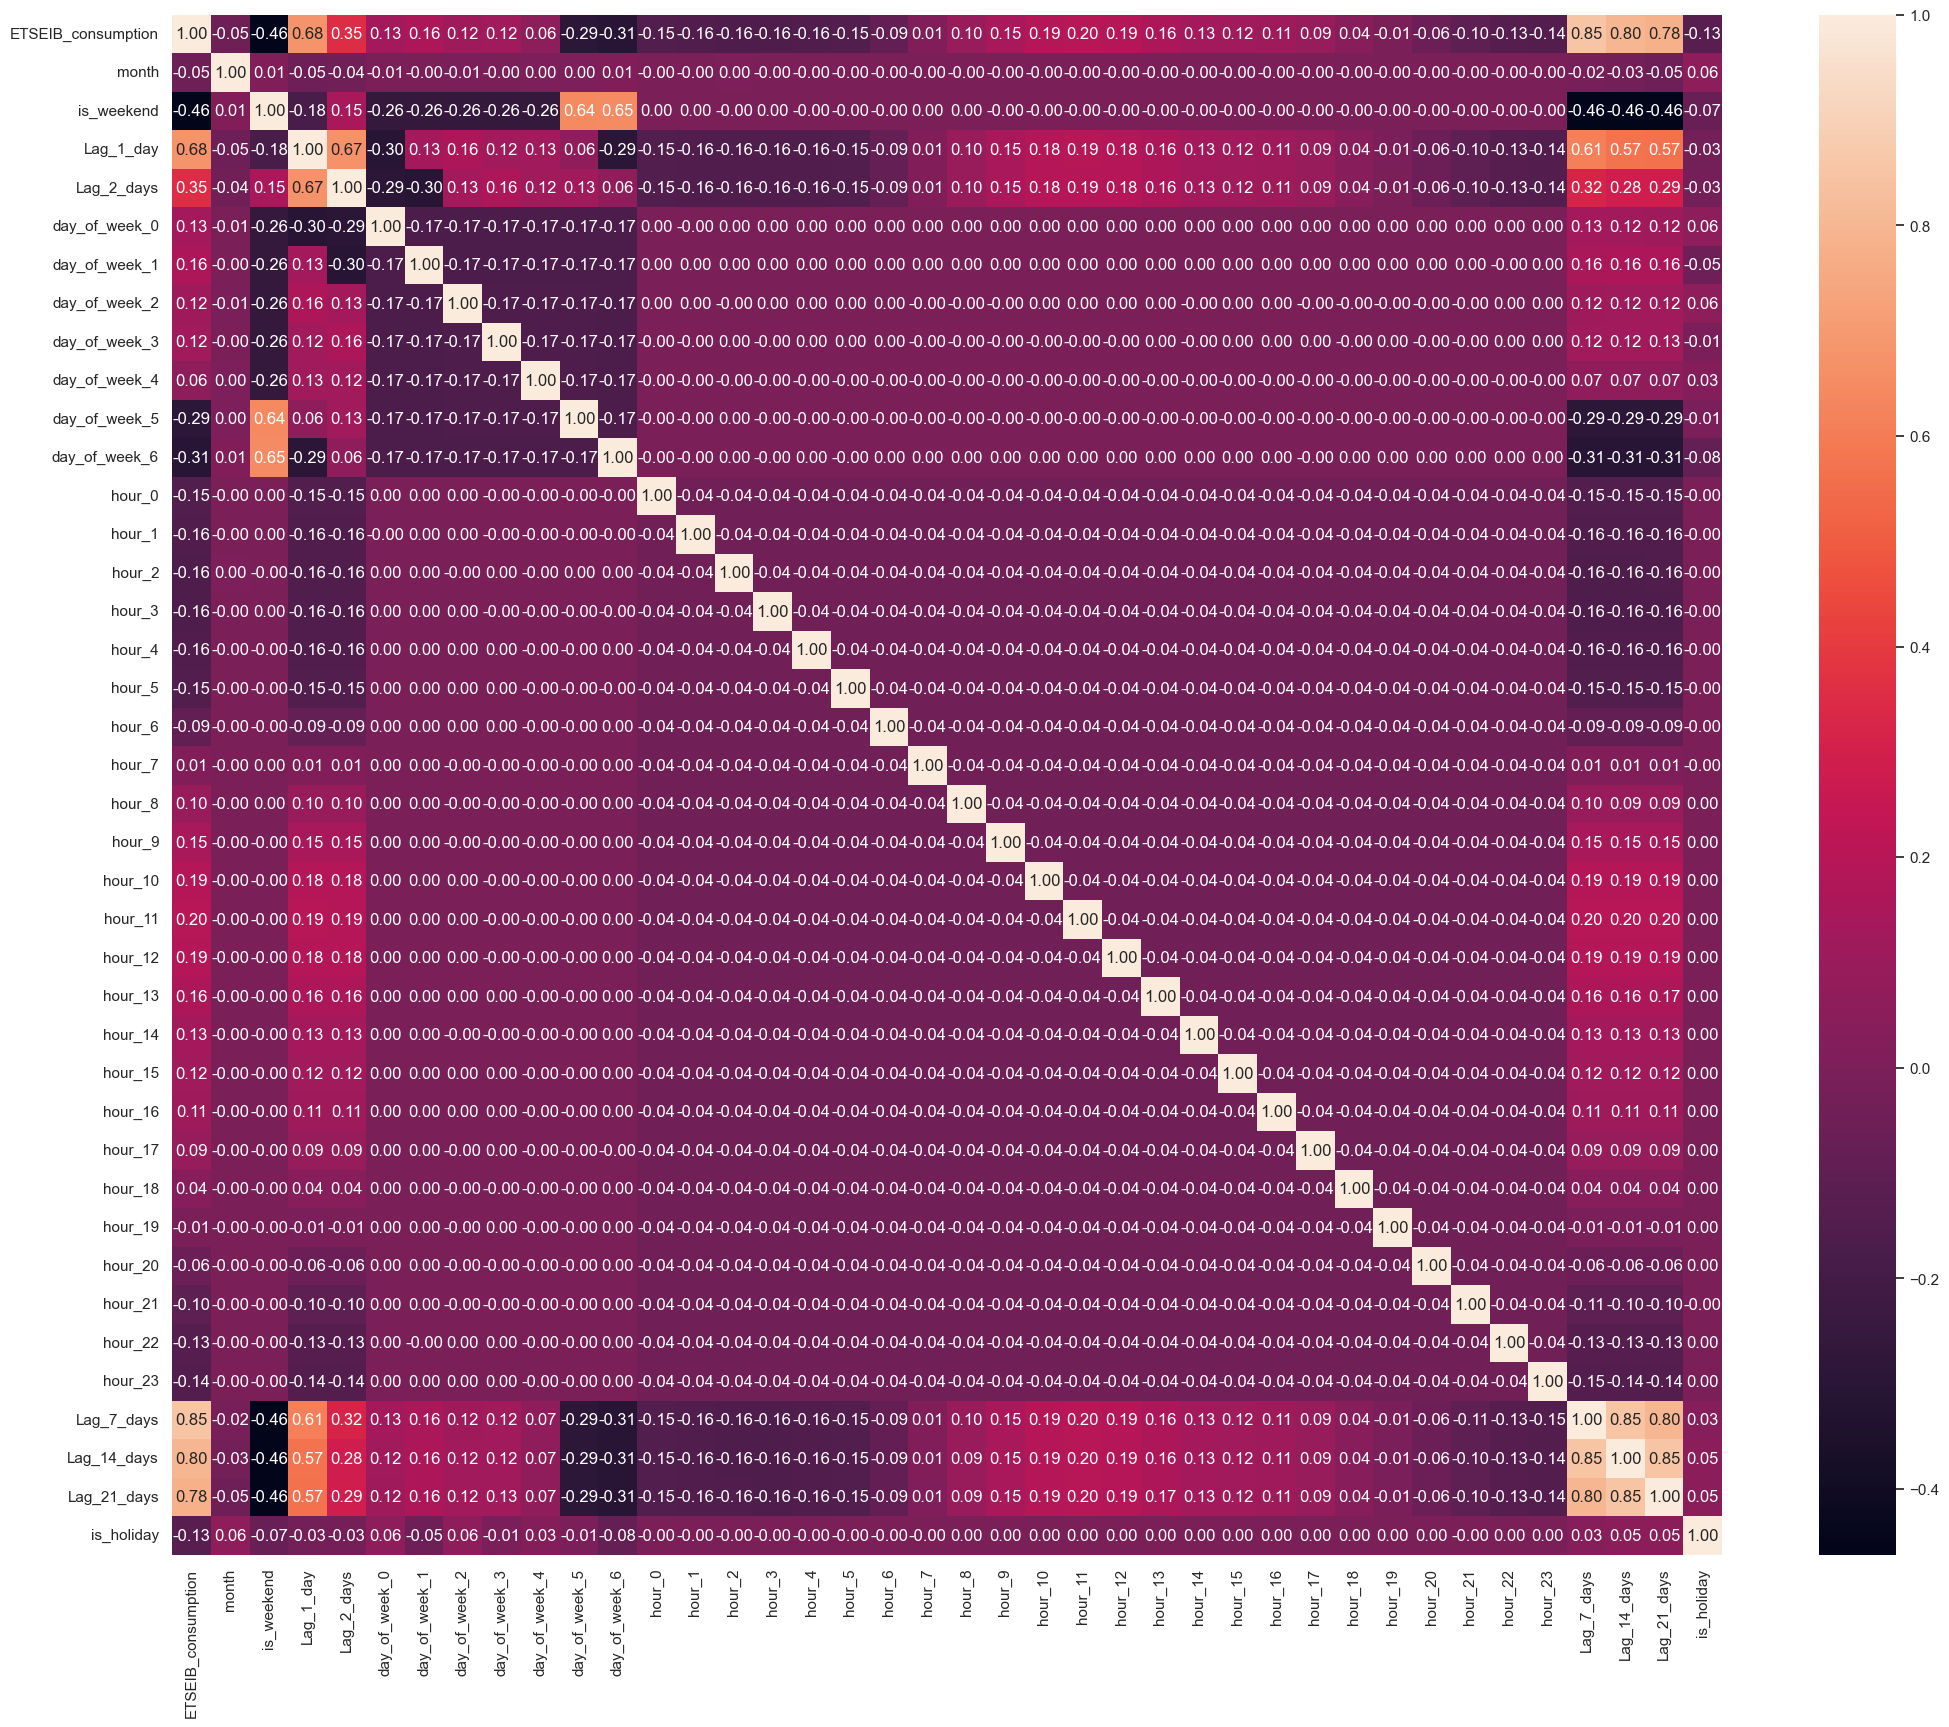

In [62]:
### Seaborn visualization library
import seaborn as sns

# Calculate the correlation matrix
corr = dataset_v2.iloc[:,1:].corr(method='pearson') 

# Plot Heat Map,
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [63]:
# Set the datetime column as index
dataset_v2 = dataset_v2.set_index('Datetime')





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 4. Split the data
    
</div>

> * Divide the data into attributes: X (features) and tags: y (target).
> * Scale the data


In [64]:
dataset_v2.to_excel("input_data_V2.xlsx")

In [65]:
# Features X ; Target y 
X = dataset_v2.drop(['ETSEIB_consumption'], axis=1) 
y = dataset_v2['ETSEIB_consumption']


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


The data are divided into training data ``X_train``, ``y_train``, validation data ``X_val``, ``y_val`` and test data ``X_test``, ``y_test``.
</div>



In [66]:
from sklearn.model_selection import train_test_split

test_size = 0.15  # percentage of the input data that I will use to validate the model

# I divide the data into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                                                    shuffle=False)

In [67]:
X_train

,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days,is_holiday
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-24 00:00:00,9,1,112.0,113.0,False,False,False,False,False,False,...,False,False,False,False,False,False,102.0,103.0,99.0,0
2023-09-24 01:00:00,9,1,109.0,113.0,False,False,False,False,False,False,...,False,False,False,False,False,False,100.0,102.0,100.0,0
2023-09-24 02:00:00,9,1,105.0,112.0,False,False,False,False,False,False,...,False,False,False,False,False,False,100.0,103.0,100.0,0
2023-09-24 03:00:00,9,1,103.0,105.0,False,False,False,False,False,False,...,False,False,False,False,False,False,99.0,104.0,99.0,0
2023-09-24 04:00:00,9,1,101.0,103.0,False,False,False,False,False,False,...,False,False,False,False,False,False,98.0,100.0,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15 07:00:00,7,0,130.0,142.0,True,False,False,False,False,False,...,False,False,False,False,False,False,273.0,282.0,162.0,0
2024-07-15 08:00:00,7,0,134.0,137.0,True,False,False,False,False,False,...,False,False,False,False,False,False,369.0,333.0,164.0,0
2024-07-15 09:00:00,7,0,138.0,135.0,True,False,False,False,False,False,...,False,False,False,False,False,False,463.0,391.0,171.0,0





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Let's scale the dataset
    
</div>


The data is scaled using the ``StandardScaler()`` method, which scales and translates each attribute individually such that it is within the range [0, 1]. This needs to be done when the scales of the attributes are different (e.g. radiation [0, 650], wind speed [2, 15]).


* ``StandardScaler()``: This scaler will standarized the values of the features to be within a specific range.
* ``fit_transform(X_train)``: This step calculates the Min and Max values from the X_train data and applies the scaling transformation.
* ``transform(X_val) and transform(X_test)``: These steps scale the validation and test sets using the same scaling parameters (Min and Max) derived from the training set, ensuring that data leakage doesn't occur.

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the StandardScaler
scaler_v2 = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler_v2.fit_transform(X_train)

# Use the same scaler to transform the validation and test data (do not fit again)
X_val_scaled = scaler_v2.transform(X_val)
X_test_scaled = scaler_v2.transform(X_test)




Now, X_train_scaled, X_val_scaled, X_test_scaled are scaled versions of the original datasets.

In [69]:
X_val_scaled

array([[ 0.23146309, -0.6352972 , -0.49698999, ...,  1.50444396,
        -0.36475605, -0.20575292],
       [ 0.23146309, -0.6352972 , -0.46129858, ...,  1.35489668,
        -0.27933994, -0.20575292],
       [ 0.23146309, -0.6352972 , -0.43988373, ...,  1.24807719,
        -0.24374989, -0.20575292],
       ...,
       [ 0.768188  , -0.6352972 ,  0.90925175, ..., -0.35421508,
        -0.56406029, -0.20575292],
       [ 0.768188  , -0.6352972 ,  0.65941185, ..., -0.41118547,
        -0.52847025, -0.20575292],
       [ 0.768188  , -0.6352972 ,  0.45240164, ..., -0.46815586,
        -0.54982428, -0.20575292]])


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 6. Model building and evaluation
    
</div>


In [70]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor


# Define the number of folds and error metrics
num_folds = 5
error_metrics = {'neg_root_mean_squared_error', 'r2'}


# Define a dictionary with models
models = {
    ('MLP', MLPRegressor()),
    ('RFR', RandomForestRegressor()),
    ('SVR', SVR()),
    ('AdaB', AdaBoostRegressor()),
    ('GBR', GradientBoostingRegressor()),  # Gradient Boosting Regressor
    ('DTR', DecisionTreeRegressor()),  # Decision Tree Regressor
    ('XGB', XGBRegressor()),  # XGBoost Regressor
    ('LR', LinearRegression()),  # Linear Regression
    ('EN', ElasticNet())  # ElasticNet Regressor
}




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">



Each of the models is trained, the results are saved and compared visually.
    
</div>


####### Evaluation metric:  r2

Training model: XGB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: XGB, r2 Mean: 0.8757, Std: 0.0742


Training model: EN with r2...
Performing TimeSeriesSplit with 5 folds...
Model: EN, r2 Mean: 0.8158, Std: 0.0520


Training model: AdaB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, r2 Mean: 0.7486, Std: 0.0640


Training model: DTR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: DTR, r2 Mean: 0.8377, Std: 0.0642


Training model: MLP with r2...
Performing TimeSeriesSplit with 5 folds...
Model: MLP, r2 Mean: 0.8339, Std: 0.1402


Training model: GBR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, r2 Mean: 0.8642, Std: 0.1032


Training model: SVR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: SVR, r2 Mean: 0.4971, Std: 0.2741


Training model: RFR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: RFR, r2 Mean: 0.8741, Std: 0.0804


Training model: LR with r2...
Pe

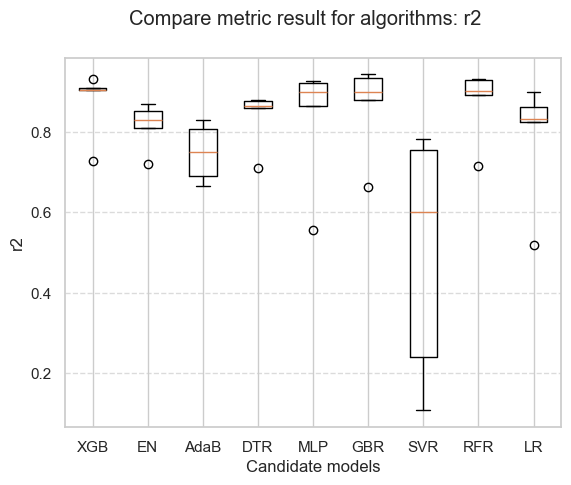

####### Evaluation metric:  neg_root_mean_squared_error

Training model: XGB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: XGB, neg_root_mean_squared_error Mean: -47.8219, Std: 15.4930


Training model: EN with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: EN, neg_root_mean_squared_error Mean: -59.5594, Std: 11.4329


Training model: AdaB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, neg_root_mean_squared_error Mean: -67.7480, Std: 8.0900


Training model: DTR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: DTR, neg_root_mean_squared_error Mean: -55.4508, Std: 11.7224


Training model: MLP with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: MLP, neg_root_mean_squared_error Mean: -53.6203, Std: 23.6368


Training model: GBR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 fold

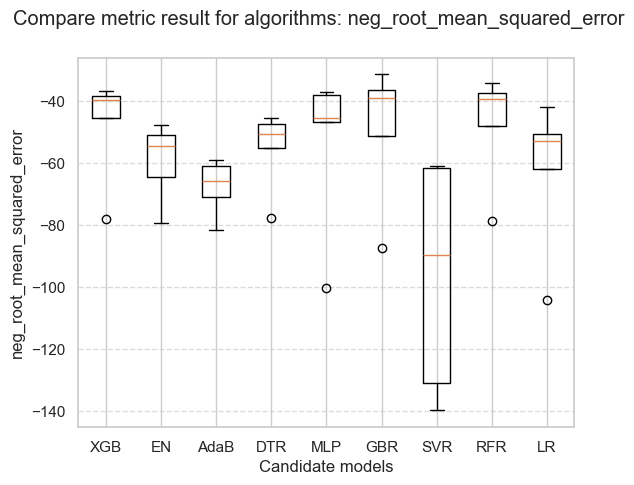

In [71]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress specific warnings from sklearn (like ConvergenceWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('####### Evaluation metric: ', scoring)
    
    for name, model in models:
        print(f'\nTraining model: {name} with {scoring}...')
        cross_validation = TimeSeriesSplit(n_splits=num_folds)
        
        # Start the cross-validation process and print verbose output
        print(f"Performing TimeSeriesSplit with {num_folds} folds...")
        
        cv_results = cross_val_score(model, X_train_scaled, y_train, cv=cross_validation, scoring=scoring)
        
        print(f"Model: {name}, {scoring} Mean: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}\n")

        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    # Show a grid for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

    results = []



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 7. Best Model Hyperparameters Adjustment
    
</div>

> Steps to perform the hyperadjustment of the parameters:
> * Specify the model to be adjusted
> * Specify a metric to optimize
> * Define the search hyperparameter ranges: *params*
> * Assign a validation method: *KFold*
> * Find the Hyperparameters with the validation data: *X_val*



In [72]:
model = RandomForestRegressor()
scoring='r2'
params = {
    # Number of trees in random forest
    'n_estimators': [100, 500],  # default=100
     # Maximum number of levels in tree
#     'max_depth': [2, None],  #deafult = None
     # Method of selecting samples for training each tree
}


# Search for the best combination of hyperparameters
cross_validation = TimeSeriesSplit(n_splits=5)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=my_cv, verbose=3)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..................n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END .................n_estimators=100;, score=-0.945 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.412 total time=   0.2s
[CV 4/5] END ..................n_estimators=100;, score=0.208 total time=   0.3s
[CV 5/5] END ..................n_estimators=100;, score=0.362 total time=   0.3s
[CV 1/5] END ..................n_estimators=500;, score=0.907 total time=   0.5s
[CV 2/5] END .................n_estimators=500;, score=-0.965 total time=   0.9s
[CV 3/5] END ..................n_estimators=500;, score=0.406 total time=   1.3s
[CV 4/5] END ..................n_estimators=500;, score=0.219 total time=   1.8s
[CV 5/5] END ..................n_estimators=500;, score=0.368 total time=   2.2s
Best result: 0.188667 using the following hyperparameters {'n_estimators': 100}





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 8. Final evaluation of the model
    
</div>

> * Finally, the model is built.
> *     
The ``fit()`` model is trained with the optimal hyperparameters found in the previous section and then the predictions are made. 
> * Use the ``X_test`` data to make the predictions



In [73]:
final_model_v2 = RandomForestRegressor(n_estimators=100) ## train again with the winner model from the Grid Search
final_model_v2.fit(X_train_scaled,y_train)  # Model training 
y_predict_v2 = final_model_v2.predict(X_test_scaled)  # prediction calculation




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


Calculate the Evaluation Metrics for this final model
    
</div>


In [74]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² (R-squared) score
r2 = r2_score(y_test, y_predict_v2)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_predict_v2, squared=False)

# Print both the R² and RMSE scores
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9007
RMSE: 38.8191




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


Plot the predictions ``y_predict`` vs the real values ``y_test``
    
</div>


In [75]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the trace for the actual consumption (True Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='True Values',
                         line=dict(color='blue', width=1.5)))


# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_v0, mode='lines', name='Predicted Values V0',
                         line=dict(color='pink', width=1.5, dash='dot')))  # 'dot' for less separated dashes


# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_v1, mode='lines', name='Predicted Values V1',
                         line=dict(color='red', width=1.5, dash='dot')))  # 'dot' for less separated dashes


# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_v2, mode='lines', name='Predicted Values V2',
                         line=dict(color='green', width=1.5, dash='dot')))  # 'dot' for less separated dashes


# Update layout for a more beautiful plot
fig.update_layout(
    title='True vs Predicted ETSEIB Consumption',
    xaxis_title='Date/Time',
    yaxis_title='Consumption (kWh)',
    template='plotly',  # dark theme, can change to 'plotly' for light theme
    hovermode='x unified',  # hover over to show values for both lines at a time
    legend=dict(
        x=0.01, y=0.99,  # position of legend
        traceorder='normal',
        font=dict(family="Arial", size=12, color="white"),
        bgcolor='rgba(0, 0, 0, 0.3)',
        bordercolor='white',
        borderwidth=1
    ),
   
   
)

# Show the plot
fig.show()

---

<div style="background-color: #ffffe0; padding: 15px; border-radius: 5px;">

# **Let's build a THIRD model!** 

</div>

> * Let's use the wrapped method for featuring engineering to see if the results are better


---

In [76]:
# As a starting point...
dataset_v3 = dataset_v2.copy()
dataset_v3

,ETSEIB_consumption,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Lag_7_days,Lag_14_days,Lag_21_days,is_holiday
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-24 00:00:00,103,9,1,112.0,113.0,False,False,False,False,False,...,False,False,False,False,False,False,102.0,103.0,99.0,0
2023-09-24 01:00:00,103,9,1,109.0,113.0,False,False,False,False,False,...,False,False,False,False,False,False,100.0,102.0,100.0,0
2023-09-24 02:00:00,104,9,1,105.0,112.0,False,False,False,False,False,...,False,False,False,False,False,False,100.0,103.0,100.0,0
2023-09-24 03:00:00,101,9,1,103.0,105.0,False,False,False,False,False,...,False,False,False,False,False,False,99.0,104.0,99.0,0
2023-09-24 04:00:00,101,9,1,101.0,103.0,False,False,False,False,False,...,False,False,False,False,False,False,98.0,100.0,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-05 19:00:00,282,11,0,176.0,114.0,False,True,False,False,False,...,False,True,False,False,False,False,249.0,213.0,216.0,0
2024-11-05 20:00:00,217,11,0,162.0,113.0,False,True,False,False,False,...,False,False,True,False,False,False,194.0,160.0,171.0,0
2024-11-05 21:00:00,168,11,0,152.0,111.0,False,True,False,False,False,...,False,False,False,True,False,False,156.0,133.0,144.0,0





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 4. Split the data
    
</div>

> * Divide the data into attributes: X (features) and tags: y (target).
> * Scale the data


In [77]:
# Features X ; Target y 
X = dataset_v3.drop(['ETSEIB_consumption'], axis=1) 
y = dataset_v3['ETSEIB_consumption']


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">


The data are divided into training data ``X_train``, ``y_train``, validation data ``X_val``, ``y_val`` and test data ``X_test``, ``y_test``.
</div>



In [78]:
from sklearn.model_selection import train_test_split

test_size = 0.15  # percentage of the input data that I will use to validate the model

# I divide the data into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                                                    shuffle=False)




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Let's scale the dataset
    
</div>


The data is scaled using the ``MinMaxScaler()`` method, which scales and translates each attribute individually such that it is within the range [0, 1]. This needs to be done when the scales of the attributes are different (e.g. radiation [0, 650], wind speed [2, 15]).


* ``MinMaxScaler()``: This scaler will normalize the values of the features to be within a specific range, typically [0, 1]. It does this by subtracting the minimum value and dividing by the range (max - min).
* ``fit_transform(X_train)``: This step calculates the Min and Max values from the X_train data and applies the scaling transformation.
* ``transform(X_val) and transform(X_test)``: These steps scale the validation and test sets using the same scaling parameters (Min and Max) derived from the training set, ensuring that data leakage doesn't occur.

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the MinMaxScaler
scaler_v3 = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler_v3.fit_transform(X_train)

# Use the same scaler to transform the validation and test data (do not fit again)
X_val_scaled = scaler_v3.transform(X_val)
X_test_scaled = scaler_v3.transform(X_test)




Now, X_train_scaled, X_val_scaled, X_test_scaled are scaled versions of the original datasets.


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

Recursive Featuring Elimination
    
</div>

> * Recursive Feature Engineering (often referred to as Recursive Feature Elimination, or RFE) in scikit-learn is a method used to select important features for a machine learning model by recursively removing less important ones. It works by training the model multiple times, each time eliminating the least important feature(s) based on model performance, until the desired number of features is reached.
> * <img src="Figures/wrapper-method.png" alt="Drawing" style="width: 800px;"/>


In [80]:
from sklearn.feature_selection import RFE


# Initialize Recursive Feature Elimination with the model and specify the number of features to select
n_features_to_select = 25  # Adjust as needed

# Initialize the model
model_rfe = RandomForestRegressor(n_estimators=500, random_state=42)
rfe = RFE(estimator=model_rfe, n_features_to_select=n_features_to_select, verbose=3)

# Fit RFE on the training data
rfe.fit(X_train_scaled, y_train) 


# Get the mask of selected features
selected_features_mask = rfe.support_

# List the selected feature names
selected_features = X.columns[selected_features_mask]

print("Selected features:", selected_features)

# Filter the original DataFrame to include only the selected features
X_selected = X[selected_features]
X_selected

Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Selected features: Index(['month', 'is_weekend', 'Lag_1_day', 'Lag_2_days', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'Lag_7_days', 'Lag_14_days', 'Lag_21_days', 'is_holiday'],
      dtype='object')


,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,Lag_7_days,Lag_14_days,Lag_21_days,is_holiday
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-24 00:00:00,9,1,112.0,113.0,False,False,False,False,False,False,...,False,False,False,False,False,False,102.0,103.0,99.0,0
2023-09-24 01:00:00,9,1,109.0,113.0,False,False,False,False,False,False,...,False,False,False,False,False,False,100.0,102.0,100.0,0
2023-09-24 02:00:00,9,1,105.0,112.0,False,False,False,False,False,False,...,False,False,False,False,False,False,100.0,103.0,100.0,0
2023-09-24 03:00:00,9,1,103.0,105.0,False,False,False,False,False,False,...,False,False,False,False,False,False,99.0,104.0,99.0,0
2023-09-24 04:00:00,9,1,101.0,103.0,False,False,False,False,False,False,...,False,False,False,False,False,False,98.0,100.0,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-05 19:00:00,11,0,176.0,114.0,False,True,False,False,False,False,...,False,False,False,False,False,False,249.0,213.0,216.0,0
2024-11-05 20:00:00,11,0,162.0,113.0,False,True,False,False,False,False,...,False,False,False,False,False,False,194.0,160.0,171.0,0
2024-11-05 21:00:00,11,0,152.0,111.0,False,True,False,False,False,False,...,False,False,False,False,False,False,156.0,133.0,144.0,0


In [81]:
selected_features_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True])

In [82]:
selected_features

Index(['month', 'is_weekend', 'Lag_1_day', 'Lag_2_days', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'Lag_7_days', 'Lag_14_days', 'Lag_21_days', 'is_holiday'],
      dtype='object')

In [ ]:
X_selected.head()

,month,is_weekend,Lag_1_day,Lag_2_days,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,Lag_7_days,Lag_14_days,Lag_21_days,is_holiday
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-24 00:00:00,9,1,112.0,113.0,False,False,False,False,False,False,...,False,False,False,False,False,False,102.0,103.0,99.0,0
2023-09-24 01:00:00,9,1,109.0,113.0,False,False,False,False,False,False,...,False,False,False,False,False,False,100.0,102.0,100.0,0
2023-09-24 02:00:00,9,1,105.0,112.0,False,False,False,False,False,False,...,False,False,False,False,False,False,100.0,103.0,100.0,0
2023-09-24 03:00:00,9,1,103.0,105.0,False,False,False,False,False,False,...,False,False,False,False,False,False,99.0,104.0,99.0,0
2023-09-24 04:00:00,9,1,101.0,103.0,False,False,False,False,False,False,...,False,False,False,False,False,False,98.0,100.0,98.0,0


In [84]:
# 4. Transform the train, validation, and test sets to include only the selected features
from sklearn.model_selection import train_test_split

test_size = 0.15  # percentage of the input data that I will use to validate the model

# I divide the data into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size,
                                                    shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                                                    shuffle=False)


from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled_selected = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test data (do not fit again)
X_val_scaled_selected = scaler.transform(X_val)
X_test_scaled_selected = scaler.transform(X_test)


In [85]:
X_train_scaled_selected

array([[ 0.768188  ,  1.57406643, -0.79679788, ..., -0.85270601,
        -0.87725268, -0.20575292],
       [ 0.768188  ,  1.57406643, -0.81821272, ..., -0.85982731,
        -0.87013467, -0.20575292],
       [ 0.768188  ,  1.57406643, -0.84676586, ..., -0.85270601,
        -0.87013467, -0.20575292],
       ...,
       [ 0.23146309, -0.6352972 , -0.61120252, ...,  1.1982281 ,
        -0.36475605, -0.20575292],
       [ 0.23146309, -0.6352972 , -0.56837282, ...,  1.49732266,
        -0.32204799, -0.20575292],
       [ 0.23146309, -0.6352972 , -0.51126656, ...,  1.61126344,
        -0.28645795, -0.20575292]])

In [86]:
# selected_features = ['month', 'is_weekend', 'day_of_week_0', 'day_of_week_1',
#        'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
#        'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_12', 'hour_13',
#        'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'Lag_1_day',
#        'Lag_2_days', 'Lag_7_days', 'Lag_14_days', 'Lag_21_days', 'is_holiday']


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 6. Model building and evaluation
    
</div>


In [87]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor


# Define the number of folds and error metrics
num_folds = 5
error_metrics = {'neg_root_mean_squared_error', 'r2'}


# Define a dictionary with models
models = {
    ('MLP', MLPRegressor()),
    ('RFR', RandomForestRegressor()),
    ('AdaB', AdaBoostRegressor()),
    ('GBR', GradientBoostingRegressor()),  # Gradient Boosting Regressor
    ('XGB', XGBRegressor()),  # XGBoost Regressor
}




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">



Each of the models is trained, the results are saved and compared visually.
    
</div>


####### Evaluation metric:  r2

Training model: AdaB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, r2 Mean: 0.7771, Std: 0.0480


Training model: GBR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, r2 Mean: 0.8650, Std: 0.0998


Training model: XGB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: XGB, r2 Mean: 0.8717, Std: 0.0776


Training model: MLP with r2...
Performing TimeSeriesSplit with 5 folds...
Model: MLP, r2 Mean: 0.7787, Std: 0.2369


Training model: RFR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: RFR, r2 Mean: 0.8733, Std: 0.0791



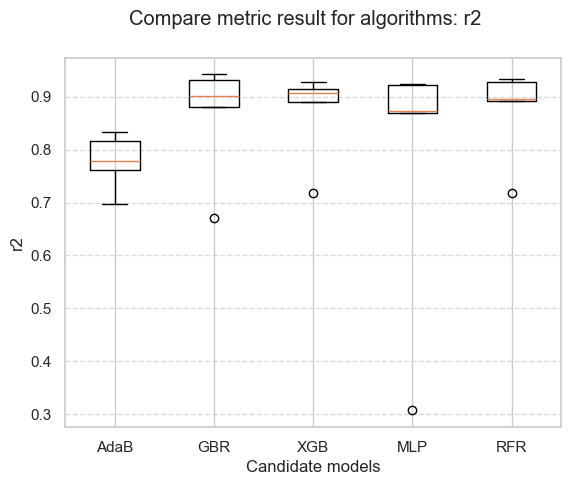

####### Evaluation metric:  neg_root_mean_squared_error

Training model: AdaB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, neg_root_mean_squared_error Mean: -66.1887, Std: 8.8488


Training model: GBR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, neg_root_mean_squared_error Mean: -49.1103, Std: 19.7647


Training model: XGB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: XGB, neg_root_mean_squared_error Mean: -48.5020, Std: 15.8176


Training model: MLP with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: MLP, neg_root_mean_squared_error Mean: -60.9632, Std: 34.3319


Training model: RFR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: RFR, neg_root_mean_squared_error Mean: -48.0095, Std: 16.1459



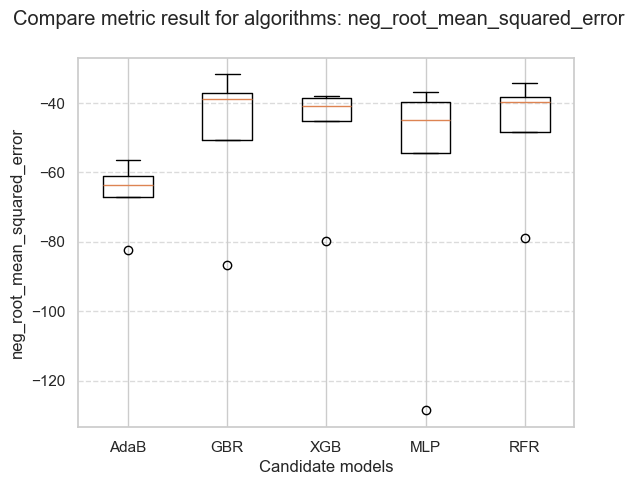

In [88]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress specific warnings from sklearn (like ConvergenceWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('####### Evaluation metric: ', scoring)
    
    for name, model in models:
        print(f'\nTraining model: {name} with {scoring}...')
        cross_validation = TimeSeriesSplit(n_splits=num_folds)
        
        # Start the cross-validation process and print verbose output
        print(f"Performing TimeSeriesSplit with {num_folds} folds...")
        
        cv_results = cross_val_score(model, X_train_scaled_selected, y_train, cv=cross_validation, scoring=scoring)
        
        print(f"Model: {name}, {scoring} Mean: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}\n")

        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    # Show a grid for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

    results = []



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 7. Best Model Hyperparameters Adjustment
    
</div>

> Steps to perform the hyperadjustment of the parameters:
> * Specify the model to be adjusted
> * Specify a metric to optimize
> * Define the search hyperparameter ranges: *params*
> * Assign a validation method: *KFold*
> * Find the Hyperparameters with the validation data: *X_val*



In [89]:
model = RandomForestRegressor()

scoring='r2'
params = {
    # Number of trees in random forest
    'n_estimators': [100, 500],  # default=100
     # Maximum number of levels in tree
#     'max_depth': [2, None],  #deafult = None
     # Method of selecting samples for training each tree
}


# Search for the best combination of hyperparameters
cross_validation = TimeSeriesSplit(n_splits=5)
my_cv = cross_validation.split(X_val_scaled_selected)
gsearch = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=my_cv, verbose=3)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..................n_estimators=100;, score=0.908 total time=   0.0s
[CV 2/5] END .................n_estimators=100;, score=-1.103 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.387 total time=   0.2s
[CV 4/5] END ..................n_estimators=100;, score=0.210 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.374 total time=   0.3s
[CV 1/5] END ..................n_estimators=500;, score=0.908 total time=   0.5s
[CV 2/5] END .................n_estimators=500;, score=-1.030 total time=   0.8s
[CV 3/5] END ..................n_estimators=500;, score=0.400 total time=   1.1s
[CV 4/5] END ..................n_estimators=500;, score=0.216 total time=   1.6s
[CV 5/5] END ..................n_estimators=500;, score=0.363 total time=   1.9s
Best result: 0.171352 using the following hyperparameters {'n_estimators': 500}





<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## 8. Final evaluation of the model
    
</div>

> * Finally, the model is built.
> *     
The ``fit()`` model is trained with the optimal hyperparameters found in the previous section and then the predictions are made. 
> * Use the ``X_test`` data to make the predictions



In [90]:
final_model_v3 = RandomForestRegressor(n_estimators=500) ## train again with the winner model from the Grid Search
final_model_v3.fit(X_train_scaled_selected, y_train)  # Model training 
y_predict_v3 = final_model_v3.predict(X_test_scaled_selected)  # prediction calculation


In [91]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² (R-squared) score
r2 = r2_score(y_test, y_predict_v3)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_predict_v3, squared=False)

# Print both the R² and RMSE scores
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9015
RMSE: 38.6684


In [92]:
dataset

,Datetime,ETSEIB_consumption,month,day_of_week,hour,is_weekend,Lag_1_day,Lag_2_days
48,2023-09-03 00:00:00,99,9,6,0,1,109.0,100.0
49,2023-09-03 01:00:00,100,9,6,1,1,108.0,98.0
50,2023-09-03 02:00:00,100,9,6,2,1,104.0,97.0
51,2023-09-03 03:00:00,99,9,6,3,1,103.0,96.0
52,2023-09-03 04:00:00,98,9,6,4,1,101.0,96.0
...,...,...,...,...,...,...,...,...
10364,2024-11-05 19:00:00,282,11,1,19,0,176.0,114.0
10365,2024-11-05 20:00:00,217,11,1,20,0,162.0,113.0
10366,2024-11-05 21:00:00,168,11,1,21,0,152.0,111.0
10367,2024-11-05 22:00:00,143,11,1,22,0,133.0,110.0



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Plot the 3 model version results
    
</div>


In [93]:
from sklearn.feature_selection import RFE


import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the trace for the actual consumption (True Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='True Values',
                         line=dict(color='blue', width=2)))

# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_v1, mode='lines', name='Predicted Values V1',
                         line=dict(color='red', width=1, dash='dot')))  # 'dot' for less separated dashes

# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_v2, mode='lines', name='Predicted Values V2',
                         line=dict(color='green', width=1, dash='dot')))  # 'dot' for less separated dashes

# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_v3, mode='lines', name='Predicted Values V3',
                         line=dict(color='darkorange', width=1, dash='dot')))  # 'dot' for less separated dashes


# Update layout for a more beautiful plot
fig.update_layout(
    title='True vs Predicted ETSEIB Consumption',
    xaxis_title='Date/Time',
    yaxis_title='Consumption (kWh)',
    template='plotly',  # dark theme, can change to 'plotly' for light theme
    hovermode='x unified',  # hover over to show values for both lines at a time
    legend=dict(
        x=0.01, y=0.99,  # position of legend
        traceorder='normal',
        font=dict(family="Arial", size=12, color="white"),
        bgcolor='rgba(0, 0, 0, 0.3)',
        bordercolor='white',
        borderwidth=1
    ),
   
   
)

# Show the plot
fig.show()

In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Calculate RMSE for each version
rmse_v1 = np.sqrt(mean_squared_error(y_test, y_predict_v1))
rmse_v2 = np.sqrt(mean_squared_error(y_test, y_predict_v2))
rmse_v3 = np.sqrt(mean_squared_error(y_test, y_predict_v3))

# Create a DataFrame to summarize the results
rmse_summary = pd.DataFrame({
    'Model Version': ['V1', 'V2', 'V3'],
    'RMSE': [rmse_v1, rmse_v2, rmse_v3]
})

# Display the table
print(rmse_summary)

  Model Version       RMSE
0            V1  46.152616
1            V2  38.819109
2            V3  38.668356


---

<div style="background-color: #ffffe0; padding: 15px; border-radius: 5px;">

# **Store the model for production use** 
    

</div>

> * The **joblib library** in scikit-learn is a powerful tool for efficiently saving, loading, and handling large Python objects, particularly when working with machine learning models and large datasets. It is designed to optimize performance for models that require a lot of memory or computation time to train. Here’s how it’s commonly used:


---

In [95]:
import joblib

# Save the model
joblib.dump(final_model_v2, 'etseib_consumption_vfinal.joblib')

['etseib_consumption_vfinal.joblib']

Later on...

In [96]:
# Load the model
loaded_model = joblib.load('etseib_consumption_vfinal.joblib')
print("Model loaded successfully!")

Model loaded successfully!


In [97]:
input_data = pd.read_excel("Data/input_data.xlsx")
# Set the 'date_column' as the index, since it is not a feature in our model
input_data.set_index('Datetime', inplace=True)
input_data

,month,is_weekend,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_0,...,hour_20,hour_21,hour_22,hour_23,Lag_1_day,Lag_2_days,Lag_7_days,Lag_14_days,Lag_21_days,is_holiday
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-11-09 00:00:00,11,1,False,False,False,False,False,True,False,True,...,False,False,False,False,128,130,121,109,125,0
2024-11-09 01:00:00,11,1,False,False,False,False,False,True,False,False,...,False,False,False,False,126,124,121,109,122,0
2024-11-09 02:00:00,11,1,False,False,False,False,False,True,False,False,...,False,False,False,False,125,123,121,107,124,0
2024-11-09 03:00:00,11,1,False,False,False,False,False,True,False,False,...,False,False,False,False,125,121,119,107,123,0
2024-11-09 04:00:00,11,1,False,False,False,False,False,True,False,False,...,False,False,False,False,124,122,119,107,122,0
2024-11-09 05:00:00,11,1,False,False,False,False,False,True,False,False,...,False,False,False,False,130,127,119,107,123,0
2024-11-09 06:00:00,11,1,False,False,False,False,False,True,False,False,...,False,False,False,False,187,196,120,121,124,0
2024-11-09 07:00:00,11,1,False,False,False,False,False,True,False,False,...,False,False,False,False,252,264,119,125,127,0
2024-11-09 08:00:00,11,1,False,False,False,False,False,True,False,False,...,False,False,False,False,313,346,119,144,126,0


In [98]:

y_predict = loaded_model.predict(input_data)
y_predict

C:\Users\stsad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



array([290.07, 290.07, 290.07, 290.07, 290.07, 290.07, 290.07, 290.07,
       290.07, 290.07, 290.07, 290.07, 290.07, 290.07, 290.07, 290.07,
       290.07, 290.07, 290.07, 290.07, 290.07, 290.07, 290.07, 290.07])

In [99]:
real_etseib_consumption = [119.00, 119.00, 116.00, 117.00, 118.00, 117.00, 117.00, 118.00, 121.00, 117.00, 119.00, 119.00, 120.00, 121.00,
120.00, 121.00, 121.00, 121.00, 120.00, 120.00, 121.00, 118.00,
118.00, 117.00]


In [100]:
from sklearn.feature_selection import RFE


import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the trace for the actual consumption (True Values)
fig.add_trace(go.Scatter(x=input_data.index, y=real_etseib_consumption, mode='lines', name='True Values',
                         line=dict(color='blue', width=2)))

# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=input_data.index, y=y_predict, mode='lines', name='Predicted Values V1',
                         line=dict(color='red', width=2, dash='dot')))  # 'dot' for less separated dashes



# Update layout for a more beautiful plot
fig.update_layout(
    title='True vs Predicted ETSEIB Consumption for 10/11/2024',
    xaxis_title='Date/Time',
    yaxis_title='Consumption (kWh)',
    yaxis=dict(range=[0, max(max(real_etseib_consumption), max(y_predict)) * 1.1]),
    template='plotly',  # dark theme, can change to 'plotly' for light theme
    hovermode='x unified',  # hover over to show values for both lines at a time
    legend=dict(
        x=0.01, y=0.01,  # position of legend
        traceorder='normal',
        font=dict(family="Arial", size=12, color="white"),
        bgcolor='rgba(0, 0, 0, 0.3)',
        bordercolor='white',
        borderwidth=1
    ),
)

# Show the plot
fig.show()